<a href="https://colab.research.google.com/github/MaykonJhonata/MVP_Maykon_Rodrigues_4025025000400/blob/main/MVP_Maykon_Jhonata_Rodrigues_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Maykon Jhonata Rodrigues

**Matrícula:** 4025025000400

**Dataset:** [AI4I 2020 Predictive Maintenance Dataset](https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020)

Este projeto tem como objetivo aplicar técnicas de análise exploratória e pré-processamento de dados a um conjunto realista e relevante do setor industrial, com foco em manutenção preditiva de máquinas.


# Descrição do Problema

O conjunto de dados selecionado, intitulado *AI4I 2020 Predictive Maintenance Dataset*, foi desenvolvido com foco na análise operacional de máquinas industriais, por meio de variáveis captadas por sensores e registros automatizados.

A proposta central é prever falhas de funcionamento com base em variáveis como temperatura do processo, velocidade rotacional, torque aplicado e desgaste da ferramenta. Tais predições permitem à indústria adotar estratégias de manutenção preditiva, o que possibilita a redução de custos operacionais, a minimização de interrupções inesperadas na produção e a promoção de maior segurança nas operações.


## Hipóteses do Problema

Com base na natureza do problema e nas características do conjunto de dados, foram formuladas as seguintes hipóteses exploratórias:

- Existe uma relação significativa entre variáveis operacionais?

- O tipo de produto produzido exerce influência sobre a frequência ou probabilidade de falhas?

- Há correlação relevante entre as variáveis numéricas, como torque e velocidade rotacional, que possa indicar colinearidade ou dependência?

- Quais atributos apresentam valores discrepantes (outliers) que podem distorcer as análises estatísticas e os modelos preditivos?

- A distribuição de classes referente à ocorrência de falhas é balanceada ou há predominância de uma das categorias?

- É possível identificar padrões recorrentes nos sensores que precedem as falhas, sugerindo sinais antecipatórios úteis para manutenção?

Essas hipóteses nortearão a análise exploratória e a fase de pré-processamento subsequente.


## Tipo de Problema

Trata-se de um problema de classificação supervisionada binária, no qual o objetivo é prever a ocorrência de falha funcional em uma máquina industrial. A variável-alvo `Machine failure` assume valor 1 para registros com falha e 0 caso contrário. O modelo será treinado com base em variáveis operacionais contínuas e categóricas disponíveis no conjunto de dados.


## Seleção de Dados

O dataset utilizado neste projeto foi obtido na plataforma Kaggle, uma das maiores comunidades de ciência de dados do mundo. A escolha do *AI4I 2020 Predictive Maintenance Dataset* se justifica por múltiplos fatores:

- **Aplicabilidade prática:** os dados simulam medições reais de sensores industriais, o que permite uma abordagem consistente com a realidade da manutenção preditiva.
- **Clareza do problema:** o dataset apresenta uma variável-alvo bem definida (`Machine failure`), compatível com modelos de classificação supervisionada.
- **Relevância acadêmica e industrial:** frequentemente citado em pesquisas sobre manutenção inteligente, o conjunto de dados oferece oportunidade de análise em contextos de engenharia de produção, confiabilidade de sistemas e otimização de ativos.


## Atributos do Dataset

O conjunto de dados contém 10.000 registros e 14 atributos, descritos a seguir:

- `UDI`: Identificador único para cada linha.
- `Product ID`: Código do produto fabricado.
- `Type`: Categoria do produto (valores possíveis: L, M, H).
- `Air temperature [K]`: Temperatura do ar em Kelvin.
- `Process temperature [K]`: Temperatura do processo em Kelvin.
- `Rotational speed [rpm]`: Velocidade de rotação da máquina.
- `Torque [Nm]`: Torque aplicado.
- `Tool wear [min]`: Tempo de uso da ferramenta, em minutos.
- `Machine failure`: Indicador de falha funcional geral (variável-alvo binária).
- `TWF`, `HDF`, `PWF`, `OSF`, `RNF`: Tipos específicos de falhas (temperatura, hidráulica, potência, sobrecarga e aleatória).

Neste projeto, o foco será exclusivamente na variável `Machine failure` como variável-alvo. As variáveis de falhas específicas serão utilizadas apenas para contextualização.


# Importação das Bibliotecas Necessárias e Carga de Dados

Nesta etapa, foram importadas as bibliotecas essenciais para a análise exploratória, visualização gráfica e pré-processamento. O carregamento inicial dos dados foi realizado a partir de um arquivo `.csv`, com posterior verificação da integridade da estrutura (dimensões e tipos de dados).


In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# carregamento do dataset


url = 'https://raw.githubusercontent.com/MaykonJhonata/Predictive-Maintenance-Dataset-AI4I-2020-/refs/heads/main/ai4i2020_modified.csv'

df = pd.read_csv(url, delimiter=',')

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.60,1551.0,42.8,0.0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.70,1408.0,46.3,3.0,0,0,0,0,0,0
2,3,L47182,L,NaN,373.15,1498.0,49.4,5.0,0,0,0,0,0,0
3,4,L47183,L,298.2,308.60,1433.0,39.5,7.0,0,0,0,0,0,0
4,5,L47184,L,298.2,308.70,1408.0,40.0,9.0,0,0,0,0,0,0


In [3]:
#analisando a dimensão do DATASET
df.shape

(10000, 14)

# Análise do carregamento de dados
Após o carregamento, confirmou-se que o dataset contém 10.000 linhas e 14 colunas, conforme documentado no repositório de origem. Essa validação inicial garante que a importação ocorreu corretamente e que os dados estão prontos para análise.


In [4]:
df.columns #entendendo as colunas do meu dataset.

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [5]:
df.rename(columns={
    'UDI': 'ID Único',
    'Product ID': 'ID do Produto',
    'Type': 'Tipo',
    'Air temperature [K]': 'Temperatura do Ar [K]',
    'Process temperature [K]': 'Temperatura do Processo [K]',
    'Rotational speed [rpm]': 'Velocidade Rotacional [rpm]',
    'Torque [Nm]': 'Torque [Nm]',
    'Tool wear [min]': 'Desgaste da Ferramenta [min]',
    'TWF': 'Falha por Temperatura',
    'HDF': 'Falha por Hidráulica',
    'PWF': 'Falha por Potência',
    'OSF': 'Falha por Sobrecarga',
    'RNF': 'Falha Aleatória',
    'Machine failure': 'Falha Geral'
}, inplace=True)


Para facilitar a compreensão e tornar a análise mais acessível ao público, os nomes das colunas foram traduzidos para o português. Essa adaptação visa melhorar a clareza da comunicação sem comprometer a integridade do conteúdo original.


In [6]:
# Conferindo os nomes das colunas se foi alterado de fato e conferindo os valores das primeiras linhas
df.head()

,ID Único,ID do Produto,Tipo,Temperatura do Ar [K],Temperatura do Processo [K],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória
0,1,M14860,M,298.1,308.60,1551.0,42.8,0.0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.70,1408.0,46.3,3.0,0,0,0,0,0,0
2,3,L47182,L,NaN,373.15,1498.0,49.4,5.0,0,0,0,0,0,0
3,4,L47183,L,298.2,308.60,1433.0,39.5,7.0,0,0,0,0,0,0
4,5,L47184,L,298.2,308.70,1408.0,40.0,9.0,0,0,0,0,0,0


# Conversão de temperaturas
As colunas de temperatura originalmente estavam na escala Kelvin. Como a escala Celsius é mais familiar em contextos industriais e acadêmicos no Brasil, foi realizada a conversão utilizando a fórmula:

°C = K - 273.15

As colunas originais em Kelvin foram removidas após a conversão para evitar redundância e possíveis ambiguidades na interpretação.



In [7]:
#convertendo a temperatura do ar (K -> ºC ). Para melhor interpretação
idx_ar = df.columns.get_loc('Temperatura do Ar [K]') + 1 #é pego o indice da coluna "Air" e soma uma posição para a nova
                                                        # coluna ficar depois dela, mantendo a ordem do dataset
df.insert(loc=idx_ar, column='Temperatura do ar [ºC]', value=df['Temperatura do Ar [K]']- 273.15)

In [8]:
#Conversão da temperatura do ar (K -> ºC)
idx_proc = df.columns.get_loc('Temperatura do Processo [K]') + 1

df.insert(loc=idx_proc, column= 'Temperatura do Processo [ºC]', value = df['Temperatura do Processo [K]']-273.75)

In [9]:
df.head(1)

,ID Único,ID do Produto,Tipo,Temperatura do Ar [K],Temperatura do ar [ºC],Temperatura do Processo [K],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória
0,1,M14860,M,298.1,24.95,308.6,34.85,1551.0,42.8,0.0,0,0,0,0,0,0


#Análise da conversão
Foi realizada uma verificação pontual para garantir a correta conversão de valores de temperatura. Por exemplo, um valor de 298.1 K resultou em aproximadamente 24.95 °C, o que está em conformidade com a fórmula aplicada.



In [10]:
#Excluindo as colunas em Kelvin para evitar duplicidade.
df.drop(columns=['Temperatura do Ar [K]', 'Temperatura do Processo [K]'], inplace=True)


In [11]:
df.head(1)

,ID Único,ID do Produto,Tipo,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória
0,1,M14860,M,24.95,34.85,1551.0,42.8,0.0,0,0,0,0,0,0


# Análise Exploratória de Dados

Nesta etapa de Análise Exploratória de Dados (EDA), o objetivo é investigar padrões, tendências e comportamentos nas variáveis disponíveis. A partir dessa análise preliminar, será possível identificar possíveis inconsistências, outliers, correlações relevantes e orientações para o pré-processamento. Com base nesse diagnóstico, estratégias mais assertivas podem ser adotadas na modelagem posterior.



## Total e Tipo das Instâncias

O conjunto de dados possui 10.000 instâncias, cada uma representando uma leitura de sensores operacionais em uma máquina industrial. Os principais atributos são contínuos (tipo *float*), com exceção de:

- `Type`: variável categórica nominal com três categorias ('L', 'M' e 'H').
- `Machine failure` e demais variáveis de falha: variáveis binárias (0 = não ocorreu falha; 1 = ocorreu falha).

As variáveis contínuas incluem: temperatura do ar, temperatura do processo, velocidade rotacional, torque e desgaste da ferramenta.

O foco desta análise será a variável `Machine failure`, que indica se a máquina apresentou falha funcional. As demais variáveis de falha auxiliar serão consideradas apenas como apoio eventual.


In [12]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 10000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Único                      10000 non-null  int64  
 1   ID do Produto                 10000 non-null  object 
 2   Tipo                          10000 non-null  object 
 3   Temperatura do ar [ºC]        9488 non-null   float64
 4   Temperatura do Processo [ºC]  10000 non-null  float64
 5   Velocidade Rotacional [rpm]   9900 non-null   float64
 6   Torque [Nm]                   10000 non-null  float64
 7   Desgaste da Ferramenta [min]  9888 non-null   float64
 8   Falha Geral                   10000 non-null  int64  
 9   Falha por Temperatura         10000 non-null  int64  
 10  Falha por Hidráulica          10000 non-null  int64  
 11  Falha por Potência            10000 non-null  int64  
 12  Falha 

**Análise inicial**

Antes de prosseguir com qualquer tratamento, foi realizada a inspeção dos atributos em busca de valores ausentes. Constatou-se que as variáveis apresentavam as seguintes ocorrências de missing data:

* Temperatura do ar

* Velocidade rotacional

* Desgaste da ferramenta

Essa etapa é fundamental para dimensionar o impacto dos dados faltantes na análise e orientar as estratégias de imputação ou exclusão.



In [13]:
df.head()

,ID Único,ID do Produto,Tipo,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória
0,1,M14860,M,24.95,34.85,1551.0,42.8,0.0,0,0,0,0,0,0
1,2,L47181,L,25.05,34.95,1408.0,46.3,3.0,0,0,0,0,0,0
2,3,L47182,L,NaN,99.40,1498.0,49.4,5.0,0,0,0,0,0,0
3,4,L47183,L,25.05,34.85,1433.0,39.5,7.0,0,0,0,0,0,0
4,5,L47184,L,25.05,34.95,1408.0,40.0,9.0,0,0,0,0,0,0


In [14]:
df.tail()

,ID Único,ID do Produto,Tipo,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória
9995,9996,M24855,M,25.65,34.65,1604.0,29.5,14.0,0,0,0,0,0,0
9996,9997,H39410,H,25.75,34.65,1632.0,31.8,17.0,0,0,0,0,0,0
9997,9998,M24857,M,25.85,34.85,1645.0,33.4,22.0,0,0,0,0,0,0
9998,9999,H39412,H,NaN,34.95,1408.0,48.5,25.0,0,0,0,0,0,0
9999,10000,M24859,M,25.85,34.95,1500.0,40.2,30.0,0,0,0,0,0,0


In [15]:
df.shape

(10000, 14)

#Verificando se o import do dataset foi um sucesso.

Conforme mostrado no número da instâncias 10000 linhas e 14 colunas e pelo df.tail() verificamos que o import foi um sucesso.

In [16]:
#Verificando o tipo de variaveis presente no data set, temos int, object e float.
df.dtypes

,0
ID Único,int64
ID do Produto,object
Tipo,object
Temperatura do ar [ºC],float64
Temperatura do Processo [ºC],float64
Velocidade Rotacional [rpm],float64
Torque [Nm],float64
Desgaste da Ferramenta [min],float64
Falha Geral,int64
Falha por Temperatura,int64


In [17]:
df.columns

Index(['ID Único', 'ID do Produto', 'Tipo', 'Temperatura do ar [ºC]',
       'Temperatura do Processo [ºC]', 'Velocidade Rotacional [rpm]',
       'Torque [Nm]', 'Desgaste da Ferramenta [min]', 'Falha Geral',
       'Falha por Temperatura', 'Falha por Hidráulica', 'Falha por Potência',
       'Falha por Sobrecarga', 'Falha Aleatória'],
      dtype='object')

In [18]:
df['Tipo'].unique()

array(['M', 'L', 'O', 'H'], dtype=object)

**Verificando os tipos únicos**

Na coluna **tipo** onde deveria haver apenas os tipos 'M', 'L' e 'H', vimos que aparece a variável categórica 'O'. É imprescindível verificar se do que se trata a inconsistência, se foi feito um produto piloto ou se foi erro de entrada.

In [19]:
df['Tipo'].value_counts()

,count
Tipo,
L,5999
M,2997
H,1003
O,1


In [20]:
df['Tipo'].value_counts(normalize=True)

,proportion
Tipo,
L,0.5999
M,0.2997
H,0.1003
O,0.0001


In [21]:
# Agrupar por tipo e calcular total de falhas e total de peças
falhas_por_tipo = df.groupby('Tipo')['Falha Geral'].agg(['sum', 'count'])

# Renomear colunas para melhor entendimento
falhas_por_tipo.columns = ['Total de Falhas', 'Total de Peças']

# Calcular porcentagem de falha por categoria
falhas_por_tipo['% de Falha'] = (falhas_por_tipo['Total de Falhas'] / falhas_por_tipo['Total de Peças']) * 100

# Ordenar pela maior porcentagem de falha
falhas_por_tipo_ordenado = falhas_por_tipo.sort_values('% de Falha', ascending=False)

# Exibir resultado
print(falhas_por_tipo_ordenado)


      Total de Falhas  Total de Peças  % de Falha
Tipo                                             
L                 235            5999    3.917320
M                  83            2997    2.769436
H                  21            1003    2.093719
O                   0               1    0.000000


**Análise dos balanceamento dos tipos de produtos produzidos.**
59.99% dos registros no dataset correspondem ao Tipo L.

29,97% correspondem ao Tipo M.

Apenas 10,03% dos registros são do Tipo H.

Desbalanceamento entre os tipos	A produção é fortemente dominada pelo Tipo L. Isso pode gerar viés nas análises se não for considerado.

Tipo H é raro	Como representa só 10% dos dados, análises estatísticas com esse grupo devem ser feitas com cuidado (amostra pequena = maior variabilidade).

Tipo M é intermediário	Tem representatividade considerável, mas ainda menor que L.

O tipo L tem um total de falhas de 235, com 5999 peças produzidas com total de 3.91% de falha.

O tipo M tem 83 falhas com total de peças de 1997 e 2.77% de falha.

O tipo H tem 21 falhas com 1003 peças produzidas, um total de 2.09% de falha.

Embora o **Tipo L** apresente o maior número absoluto e percentual de falhas, isso pode ser atribuído ao seu **volume significativamente maior de produção**. As diferenças nas taxas de falha entre os tipos **não são tão grandes** a ponto de afirmar, com segurança, que o tipo de produto fabricado influencia diretamente na probabilidade de falha da máquina.

Portanto, **não há evidência suficiente para concluir que o tipo de peça afeta de forma significativa o risco de falha**


**Analisando os valores únicos pelo tipo de produtos** vemos que existe um erro de digitação o tipo 'O' aparece apenas uma vez, deve ser feito um tratamento e colocar a mediana que é o tipo 'L', ou até mesmo como representa 0,01% do dataset deverá ser feita a exclusão

#VERIFICAÇÃO DE DADOS AUSENTES

usando o comando df.shape foi possível observar que há missing nas seguintes colunas:

*   Temperatura do ar
*   Velocidade Rotacional
*   Desgaste da ferramenta

Agora vamos fazer uma análise para entender melhor esses valores faltantes.

In [22]:
df.isnull().sum()

,0
ID Único,0
ID do Produto,0
Tipo,0
Temperatura do ar [ºC],512
Temperatura do Processo [ºC],0
Velocidade Rotacional [rpm],100
Torque [Nm],0
Desgaste da Ferramenta [min],112
Falha Geral,0
Falha por Temperatura,0


In [23]:
Missing_Percent = df.isnull().mean() * 100
Missing_Percent = Missing_Percent[Missing_Percent > 0].sort_values(ascending=False)

print(Missing_Percent)


Temperatura do ar [ºC]          5.12
Desgaste da Ferramenta [min]    1.12
Velocidade Rotacional [rpm]     1.00
dtype: float64


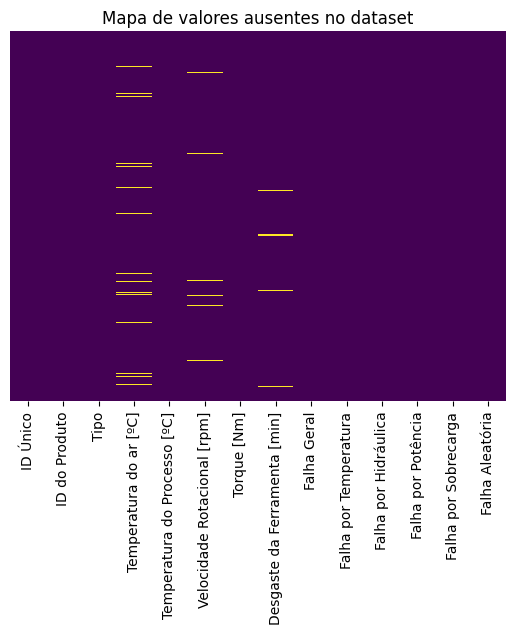

In [24]:
# Heatmap para verificar valores ausentes.
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Mapa de valores ausentes no dataset")
plt.show()

**Análise de valores ausentes (missing values)**

Utilizando o comando df.isnull(), Para cada uma das variáveis com missing values, calculou-se o percentual de registros faltantes:

*   Temperatura do ar 5.12%
*   Desgaste da ferramenta 1.12%
*   Velocidade Rotacional 1%


Esses valores indicam que apenas um dos atributos ultrapassa 5 % de dados ausentes, sugerindo que a imputação conservadora pode ser adotada sem prejuízo substancial à representatividade dos dados.





## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [25]:
# estatísticas descritivas básicas do dataset
df.describe()

,ID Único,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória
count,10000.00000,9488.000000,10000.000000,9900.000000,10000.000000,9888.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,26.854163,36.262025,1538.696263,39.986910,107.901800,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000149,1.612439,182.594711,9.968934,63.641129,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,22.150000,31.950000,0.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,25.150000,35.050000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,26.950000,36.350000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,28.350000,37.350000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,31.350000,99.400000,4000.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [26]:
df.describe(include='object') #Para variavél categorica, saber quais tipos de produsos é mais frequente.

,ID do Produto,Tipo
count,10000,10000
unique,10000,4
top,L57163,L
freq,1,5999


In [27]:
df.nunique()

,0
ID Único,10000
ID do Produto,10000
Tipo,4
Temperatura do ar [ºC],93
Temperatura do Processo [ºC],83
Velocidade Rotacional [rpm],941
Torque [Nm],577
Desgaste da Ferramenta [min],246
Falha Geral,2
Falha por Temperatura,2


In [28]:
df['Tipo'].value_counts()

,count
Tipo,
L,5999
M,2997
H,1003
O,1


**Média**

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [29]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
ID Único,5000.500000
Temperatura do ar [ºC],26.854163
Temperatura do Processo [ºC],36.262025
Velocidade Rotacional [rpm],1538.696263
Torque [Nm],39.986910
Desgaste da Ferramenta [min],107.901800
Falha Geral,0.033900
Falha por Temperatura,0.004600
Falha por Hidráulica,0.011500
Falha por Potência,0.009500


**Análise das Médias do Dataset**

As médias das principais variáveis numéricas do dataset são:

- **Temperatura do Ar:** 26,8 ºC  
- **Temperatura do Processo:** 36,22 ºC  
- **Velocidade Rotacional:** 1538,69 rpm  
- **Torque:** 39,9 Nm  
- **Desgaste da Ferramenta:** 107,9 minutos  

As demais variáveis são do tipo **booleana** ou **categórica** (como a coluna de falha), e, nesses casos, a **moda** é a medida de tendência central mais adequada.

Vale destacar que a média, sozinha, pode ocultar aspectos importantes como **distribuição dos dados, presença de outliers ou assimetria**. Por isso, é fundamental complementá-la com análises gráficas, como **histogramas e boxplots**, para uma interpretação mais confiável.


In [30]:
# Contagem de falhas (1) e não falhas (0)
contagem_falhas = df['Falha Geral'].value_counts().sort_index()

# Exibir resultado
print(f"Total de peças SEM falha: {contagem_falhas[0]}")
print(f"Total de peças COM falha: {contagem_falhas[1]}")

Total de peças SEM falha: 9661
Total de peças COM falha: 339


**Análise do total de falhas**

É importante saber que houve falha em apenas 339 dos casos observados e não falha em 9660 dos casos observados.
## Análise do Total de Ocorrências de Falhas

Ao observar a variável-alvo `Machine failure`, constata-se que, entre as 10.000 instâncias do conjunto de dados, apenas 339 registram ocorrência de falha, enquanto 9.661 correspondem a casos sem falha reportada.

Esse desequilíbrio nas classes (aproximadamente 3,4% de falhas e 96,6% de não falhas) caracteriza um problema clássico de **desbalanceamento de classes**, o que impõe desafios significativos para algoritmos de classificação supervisionada. Modelos treinados sobre dados desbalanceados tendem a favorecer a classe majoritária, podendo resultar em **falsos negativos** elevados — ou seja, falhas reais deixarem de ser detectadas.

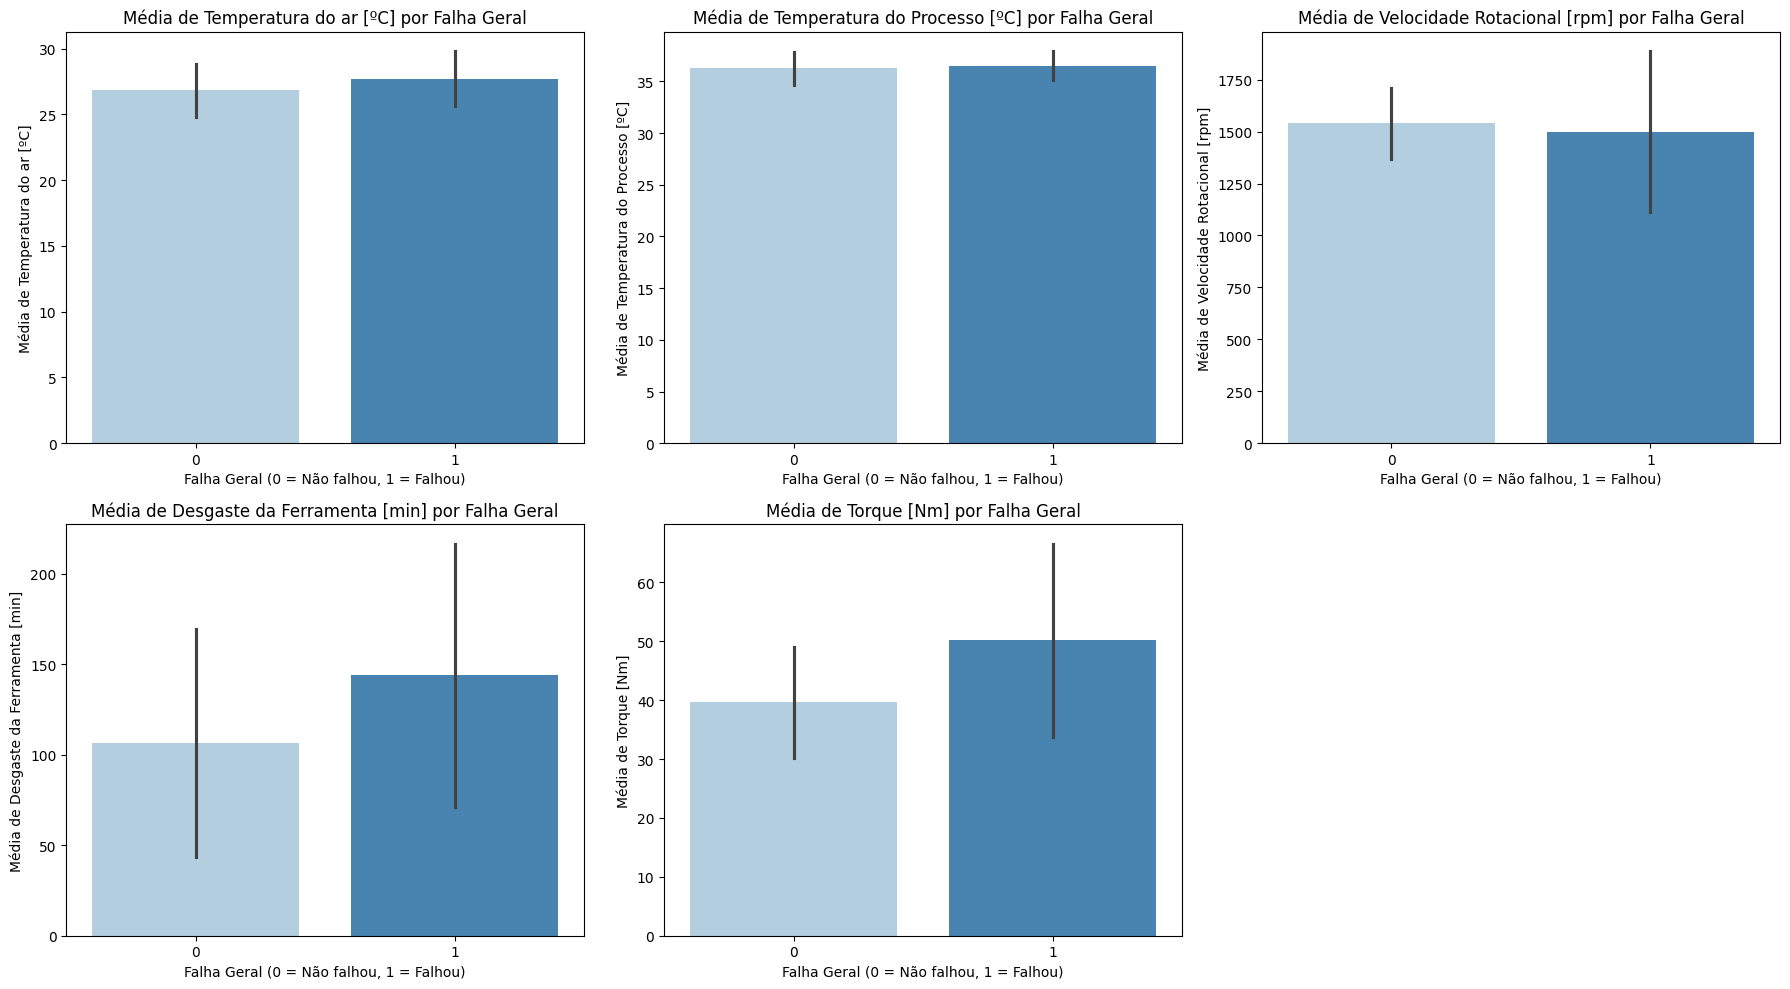

In [31]:
# Lista das variáveis numéricas
variaveis = ['Temperatura do ar [ºC]', 'Temperatura do Processo [ºC]',
             'Velocidade Rotacional [rpm]', 'Desgaste da Ferramenta [min]', 'Torque [Nm]']

# Tamanho da grade de subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Facilita o uso do loop

# Loop para criar gráficos de barras em subplots
for i, var in enumerate(variaveis):
    sns.barplot(x='Falha Geral', y=var, data=df, errorbar='sd',
                hue='Falha Geral', palette='Blues', legend=False, ax=axes[i])
    axes[i].set_title(f'Média de {var} por Falha Geral')
    axes[i].set_xlabel('Falha Geral (0 = Não falhou, 1 = Falhou)')
    axes[i].set_ylabel(f'Média de {var}')

# Remove o último subplot vazio, se houver
if len(variaveis) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


**Análise das Médias por Ocorrência de Falha**

A partir dos gráficos de média por "Falha Geral", é possível observar os seguintes padrões:

- **Temperatura do Ar e do Processo:**  
  Não há diferença significativa entre os grupos com e sem falha. Isso sugere que **essas variáveis não são bons indicadores diretos de falha**.

- **Velocidade Rotacional:**  
  A **média de rotação é menor nos casos com falha**, indicando que a **redução na rotação** pode estar associada a falhas. É um possível sinal de alerta.

- **Desgaste da Ferramenta:**  
  Casos com falha tendem a ocorrer quando o **desgaste ultrapassa 100 minutos**. Isso sugere que **o tempo de uso prolongado pode aumentar o risco de falhas**.

- **Torque:**  
  O comportamento do torque é interessante:  
  - Em torques **até 40 Nm**, há menos falhas;  
  - Quando o torque ultrapassa **40 Nm**, as falhas se tornam mais frequentes.  
  Isso indica que **torques mais altos podem contribuir para falhas no processo**.

Essas observações são importantes para a construção de modelos preditivos ou para estabelecer limites operacionais seguros.

In [32]:
# Filtra apenas as linhas com falha geral = 1
falhas = df[df['Falha Geral'] == 1]

# Conta quantos casos com falha têm desgaste abaixo de 100 min
falhas_menor_100 = falhas[falhas['Desgaste da Ferramenta [min]'] < 100]

# Mostra a quantidade e proporção
print(f'Total de falhas: {len(falhas)}')
print(f'Falhas com desgaste < 100 min: {len(falhas_menor_100)}')
print(f'Proporção: {len(falhas_menor_100)/len(falhas):.2%}')


Total de falhas: 339
Falhas com desgaste < 100 min: 101
Proporção: 29.79%


**Observação adicional sobre o desgaste da ferramenta:**

Das **339 falhas registradas**, apenas **101 ocorreram com desgaste inferior a 100 minutos**, o que representa **apenas 29,79%** do total. Isso reforça a hipótese de que **a maioria das falhas está associada a um desgaste acima de 100 minutos**, fortalecendo essa variável como um possível **indicador de falha iminente**.


/tmp/ipython-input-33-1516891163.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=falhas_df, x='Tipo de Falha', y='Quantidade', palette='Set2')


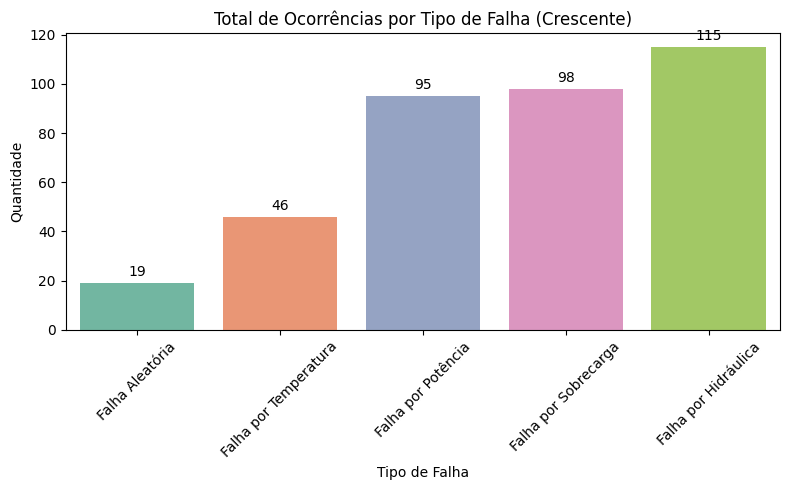

In [33]:
# Soma total de cada tipo de falha
falhas = df[['Falha por Temperatura', 'Falha por Hidráulica', 'Falha por Potência',
             'Falha por Sobrecarga', 'Falha Aleatória']].sum()

# Cria o DataFrame e ordena por Quantidade (de forma crescente)
falhas_df = pd.DataFrame({'Tipo de Falha': falhas.index, 'Quantidade': falhas.values})
falhas_df = falhas_df.sort_values(by='Quantidade', ascending=True)

# Plota o gráfico
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=falhas_df, x='Tipo de Falha', y='Quantidade', palette='Set2')
plt.title('Total de Ocorrências por Tipo de Falha (Crescente)')
plt.xticks(rotation=45)

# Adiciona o valor acima de cada barra
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3, fontsize=10)

plt.tight_layout()
plt.show()


Análise do Gráfico de Ocorrências por Tipo de Falha

Com base no gráfico, podemos observar que:

- **Falha por Hidráulica (115)** é a mais frequente no dataset.
- Em seguida, temos a **Falha por Sobrecarga (98)** e a **Falha por Potência (95)**, que também ocorrem com frequência significativa.
- A **Falha por Temperatura (46)** aparece com uma frequência consideravelmente menor.
- Por fim, a **Falha Aleatória (19)** é a menos comum entre todas.

Essa análise ajuda a entender quais tipos de falhas são mais relevantes para investigação e priorização em modelos preditivos ou ações corretivas.


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [34]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
ID Único,2886.895680
Temperatura do ar [ºC],2.000149
Temperatura do Processo [ºC],1.612439
Velocidade Rotacional [rpm],182.594711
Torque [Nm],9.968934
Desgaste da Ferramenta [min],63.641129
Falha Geral,0.180981
Falha por Temperatura,0.067671
Falha por Hidráulica,0.106625
Falha por Potência,0.097009


/tmp/ipython-input-35-3763738345.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_desvio, y='Variável', x='Desvio Padrão', palette='viridis')


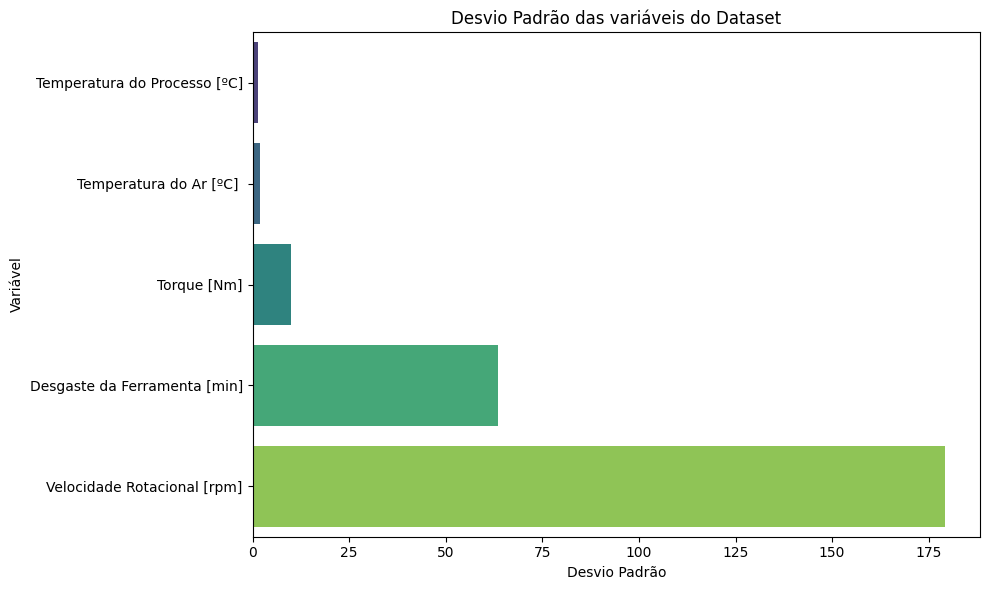

In [35]:
# Desvio padrão do df

desvios = {
    'Temperatura do Ar [ºC] ': 1.998344,
    'Temperatura do Processo [ºC]': 1.483734,
    'Velocidade Rotacional [rpm]': 179.310234,
    'Torque [Nm]': 9.968934,
    'Desgaste da Ferramenta [min]': 63.536597
}


#gransformando em dataFrame para facilitar plotar o gráfico.

df_desvio = pd.DataFrame(list(desvios.items()), columns=['Variável', 'Desvio Padrão'])
df_desvio.sort_values(by='Desvio Padrão', ascending=True, inplace=True)

#Gráfico de barras horizontais

plt.figure(figsize=(10,6))
sns.barplot(data=df_desvio, y='Variável', x='Desvio Padrão', palette='viridis')
plt.title('Desvio Padrão das variáveis do Dataset')
plt.xlabel('Desvio Padrão')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

### Interpretando gráfico de dispersão por ocorrência de falha

Antes de analisar a correlação numérica entre variáveis, é fundamental observar a **distribuição visual dos dados** por meio de **gráficos de dispersão**. Eles permitem identificar padrões, agrupamentos, outliers e possíveis **zonas críticas** onde as falhas se concentram. Além disso, ajudam a interpretar a correlação de forma mais intuitiva do que um número isolado.








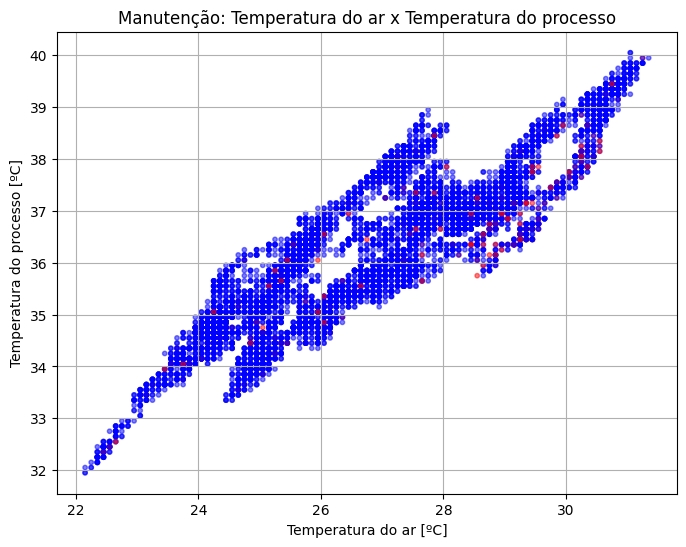

In [36]:
# Define cores com base na condição
cores = ['b' if x == 0 else 'r' for x in df['Falha Geral']]

# Plota o gráfico de dispersão com as cores definidas
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperatura do ar [ºC]'], df['Temperatura do Processo [ºC]'], c=cores, alpha=0.5, s=10)

plt.title('Manutenção: Temperatura do ar x Temperatura do processo')
plt.xlabel('Temperatura do ar [ºC]')
plt.ylabel('Temperatura do processo [ºC]')
plt.grid(True)
plt.show()

- As variáveis **Temperatura do Ar** e **Temperatura do Processo** mostram uma **relação positiva forte**, o que é esperado.
- Observa-se que, **em temperaturas mais altas**, há **maior incidência de falhas**, o que indica que o calor pode ser um fator de risco.
- No entanto, falhas **também ocorrem em faixas mais baixas de temperatura**, mostrando que **a temperatura, embora importante, não é o único fator determinante**.

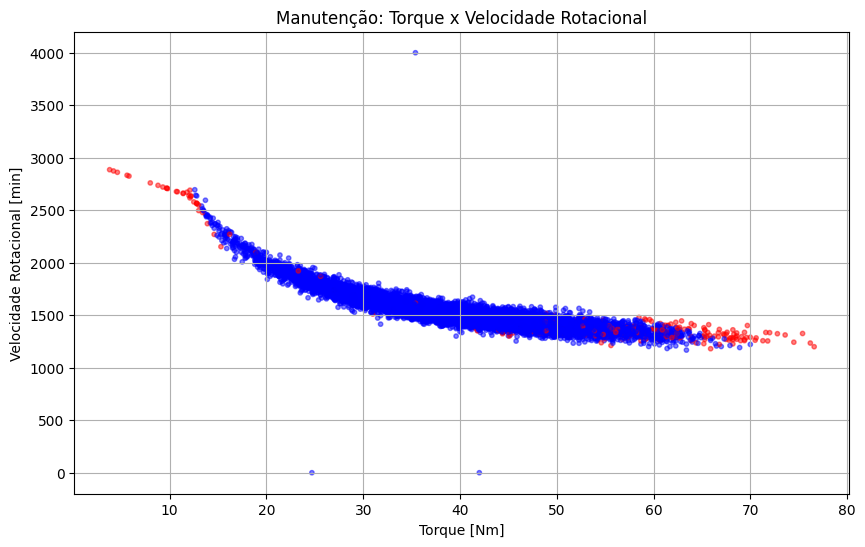

In [37]:
# Define cores com base na condição
cores = ['b' if x == 0 else 'r' for x in df['Falha Geral']]

# Plota o gráfico de dispersão com as cores definidas
plt.figure(figsize=(10, 6))
plt.scatter(df['Torque [Nm]'], df['Velocidade Rotacional [rpm]'], c=cores, alpha=0.5, s=10)

plt.title('Manutenção: Torque x Velocidade Rotacional')
plt.xlabel('Torque [Nm]')
plt.ylabel('Velocidade Rotacional [min]')
plt.grid(True)
plt.show()

- A relação entre **Torque** e **Velocidade Rotacional** é **negativa**, ou seja, quando o torque aumenta, a rotação tende a diminuir — comportamento esperado em motores sob carga.
- Um padrão interessante observado é que:
  - **Altos torques combinados com baixas rotações** estão associados a **muitos casos de falha**.
  - **Baixos torques e altas rotações** também aparecem com frequência em falhas.
- Isso sugere que há **zonas operacionais críticas** nas extremidades do gráfico que podem servir como alerta para manutenção preditiva.

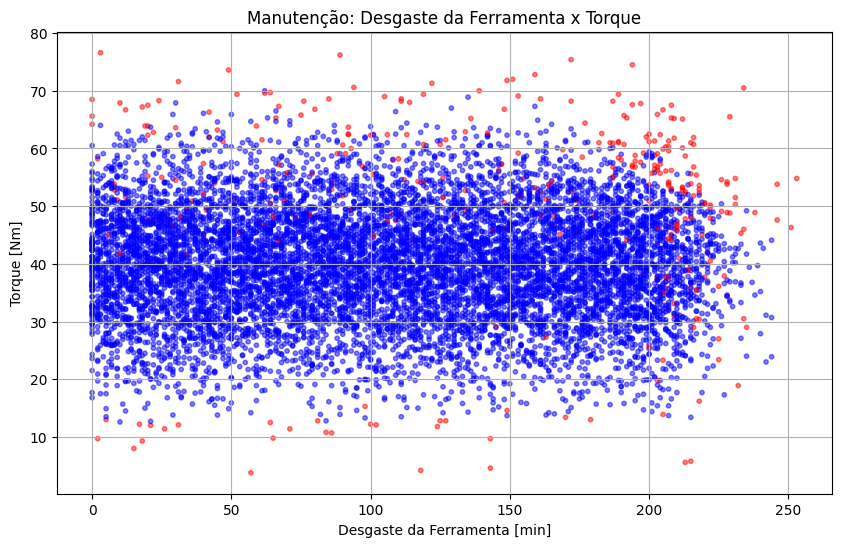

In [38]:
# Define cores com base na condição
cores = ['b' if x == 0 else 'r' for x in df['Falha Geral']]

# Plota o gráfico de dispersão com as cores definidas
plt.figure(figsize=(10, 6))
plt.scatter(df['Desgaste da Ferramenta [min]'], df['Torque [Nm]'], c=cores, alpha=0.5, s=10)

plt.title('Manutenção: Desgaste da Ferramenta x Torque')
plt.xlabel('Desgaste da Ferramenta [min]')
plt.ylabel('Torque [Nm]')
plt.grid(True)
plt.show()

**Torque vs. Desgaste da Ferramenta**

A análise do gráfico de dispersão entre **Torque [Nm]** e **Desgaste da Ferramenta [min]** mostra que:

- As **falhas ocorrem nos dois extremos**, mas há uma **concentração mais clara na parte superior do gráfico**.
- No eixo do **torque**, os valores mais altos apresentam maior densidade de falhas — indicando que **operações sob alto esforço mecânico** são mais propensas a falhas.
- Já no eixo de **desgaste**, a maior concentração de falhas ocorre **acima de 200 minutos de uso da ferramenta**, sugerindo que **o tempo de uso da ferramenta é um fator crítico**.

Esse comportamento indica que, embora falhas possam ocorrer em qualquer ponto da operação, os **limites superiores de carga e tempo de uso** representam **zonas de alto risco**, que devem ser priorizadas em modelos preditivos ou estratégias de manutenção.

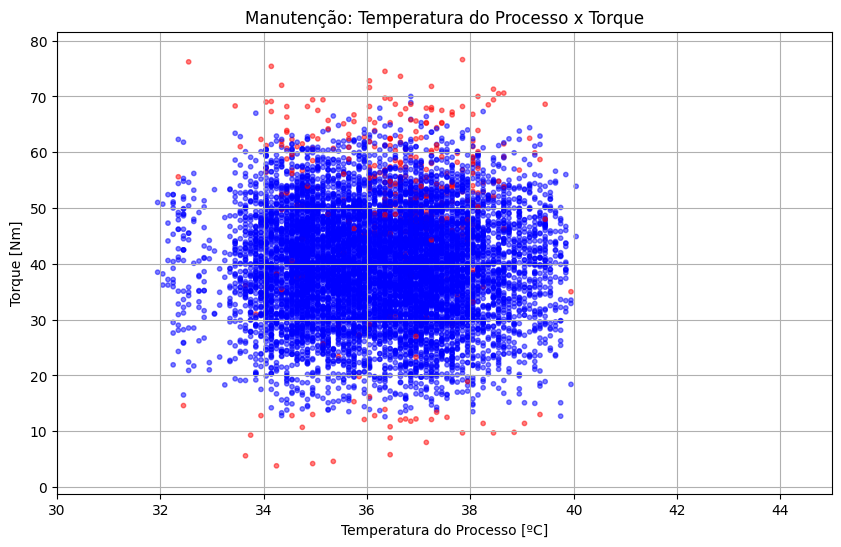

In [39]:
# Define cores com base na condição
cores = ['b' if x == 0 else 'r' for x in df['Falha Geral']]

# Plota o gráfico de dispersão com as cores definidas
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperatura do Processo [ºC]'], df['Torque [Nm]'], c=cores, alpha=0.5, s=10)
plt.title('Manutenção: Temperatura do Processo x Torque')
plt.xlabel('Temperatura do Processo [ºC]')
plt.ylabel('Torque [Nm]')
plt.grid(True)
# Limita o eixo X e y até um valor maximo
plt.xlim(30, 45)
plt.ylim(df['Torque [Nm]'].min() - 5, df['Torque [Nm]'].max() + 5)

plt.show()

**Torque vs. Temperatura do Processo**

A análise entre **Torque [Nm]** e **Temperatura do Processo [ºC]** revelou que as falhas **não estão concentradas apenas em cargas elevadas**, mas sim em **zonas específicas de operação**:

- **Acima de 50 Nm de torque**, há uma elevação clara da temperatura, e as falhas se tornam mais frequentes — indicando um padrão esperado de esforço mecânico sob carga.
- Contudo, observa-se também uma **concentração de falhas em situações de torque muito baixo (menor que 20 Nm)**, onde a **temperatura do processo se eleva anormalmente**.

Essa região representa uma **zona crítica não convencional**, indicando que **mesmo em baixas rotações, o sistema pode estar superaquecendo** — o que pode sugerir:

- Problemas de refrigeração
- Acúmulo de calor por falhas internas
- Fricção excessiva mesmo com baixa carga
- Erros operacionais ou ciclos ineficientes

Esses achados reforçam a importância de considerar **interações entre variáveis operacionais**, e não apenas valores isolados, para antecipar falhas com maior precisão.


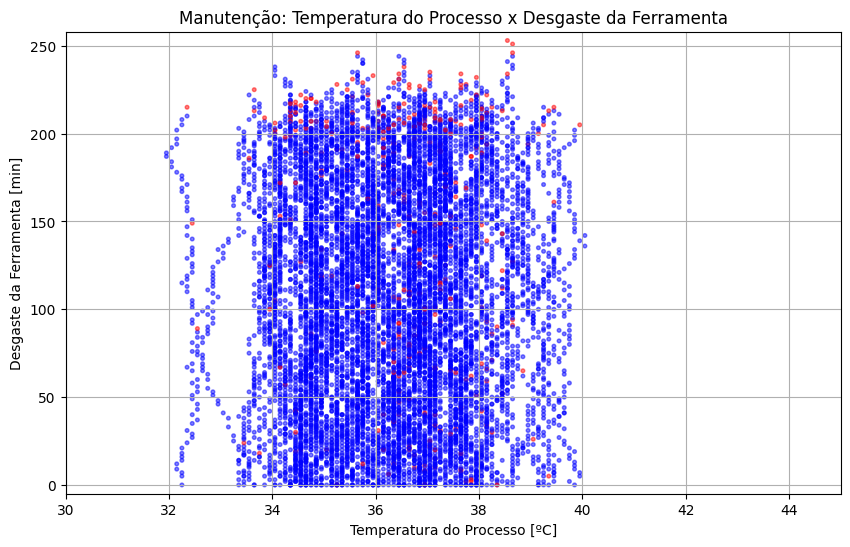

In [40]:
# Define cores com base na condição
cores = ['b' if x == 0 else 'r' for x in df['Falha Geral']]

# Plota o gráfico de dispersão com as cores definidas
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperatura do Processo [ºC]'], df['Desgaste da Ferramenta [min]'], c=cores, alpha=0.5, s=7)
plt.title('Manutenção: Temperatura do Processo x Desgaste da Ferramenta')
plt.xlabel('Temperatura do Processo [ºC]')
plt.ylabel('Desgaste da Ferramenta [min]')
plt.grid(True)
# Limita o eixo X e y até um valor maximo
plt.xlim(30, 45)
plt.ylim(df['Desgaste da Ferramenta [min]'].min() - 5, df['Desgaste da Ferramenta [min]'].max() + 5)

plt.show()

Ao cruzar as variáveis **Temperatura do Processo [°C]** e **Desgaste da Ferramenta [min]**, foi possível identificar padrões significativos relacionados à ocorrência de falhas.

Observações principais:

- **Temperaturas mais elevadas do processo** (acima de **36 °C**) estão consistentemente associadas a um maior número de falhas, indicando que o aquecimento excessivo pode comprometer o desempenho das máquinas.
- O **desgaste elevado da ferramenta** (acima de **200 min**) também se mostra um fator crítico para falhas, especialmente quando combinado com temperaturas igualmente altas.
- O maior índice de falhas foi observado na **faixa crítica entre 36 °C e 38 °C de temperatura do processo**, **com desgaste da ferramenta entre 200 min e 250 min**. Este intervalo representa um ponto de atenção importante para a manutenção preditiva.
- Curiosamente, **temperaturas ainda mais altas (38 °C a 40 °C)** também apresentaram alta taxa de falha, **mesmo com desgaste relativamente baixo**, sugerindo que o fator térmico isolado pode ser suficiente para comprometer a operação.
- Embora em menor proporção, há também casos de falhas em condições de **temperatura baixa com desgaste baixo**, o que indica que outros fatores latentes (não analisados neste gráfico) podem estar contribuindo em algumas situações específicas.

Esse cruzamento reforça a importância de monitorar simultaneamente variáveis térmicas e mecânicas para prevenir falhas, além de indicar **regiões de risco operacional** onde estratégias de intervenção preventiva podem ser mais eficazes.

### Interpretando o Desvio Padrão

O desvio padrão da **Velocidade Rotacional** é alto (179.3), indicando que os dados dessa variável são mais heterogêneos e apresentam grande variação. Nesse caso, se houver valores ausentes, a **mediana** é mais indicada para imputação, pois é menos sensível a outliers.

O **Desgaste da Ferramenta**, com desvio padrão de 63.5, também apresenta alta variabilidade e segue a mesma lógica: melhor imputar com a mediana, se necessário.

Por outro lado, variáveis como **Temperatura do Ar**, **Temperatura do Processo** e **Torque** apresentam desvios padrão mais baixos, o que sugere dados mais homogêneos e concentrados em torno da média. Assim, caso haja valores nulos nessas colunas, a **média** pode ser uma boa estratégia de imputação.

Essa análise ajuda a escolher métodos de preenchimento de dados ausentes mais apropriados, com base na dispersão dos valores em cada variável.


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *Temperatura do Ar*


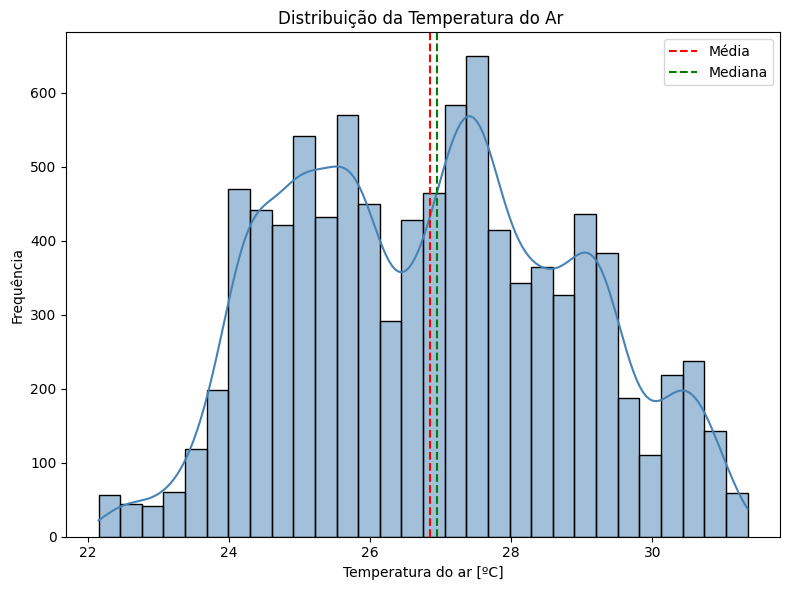

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(df['Temperatura do ar [ºC]'], kde=True, bins=30, color='steelblue')
plt.axvline(df['Temperatura do ar [ºC]'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['Temperatura do ar [ºC]'].median(), color='green', linestyle='--', label='Mediana')
plt.title('Distribuição da Temperatura do Ar ')
plt.xlabel('Temperatura do ar [ºC]')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

### Análise do Histograma: Temperatura do Ar [ºC]

Ao observar o histograma da variável **Temperatura do Ar**, nota-se um comportamento aparentemente **bimodal**, com dois picos distintos. No entanto, um dos picos é mais pronunciado, concentrando-se em torno de **28 ºC**, sugerindo que a **moda** dessa variável está nesse valor.

Essa característica pode estar associada a **variações sazonais**, como mudanças de estação (ex: **verão e primavera**), ou a **condições operacionais diferentes** ao longo do tempo.

Mesmo com essa leve bimodalidade, a distribuição se mantém relativamente **concentrada**, e não há forte evidência de outliers extremos. Por isso, neste caso, **não há necessidade imediata de aplicar transformações**, mas vale a pena observar essa tendência ao modelar os dados ou realizar segmentações mais específicas.


### *Temperatura do Processo [ºC]*


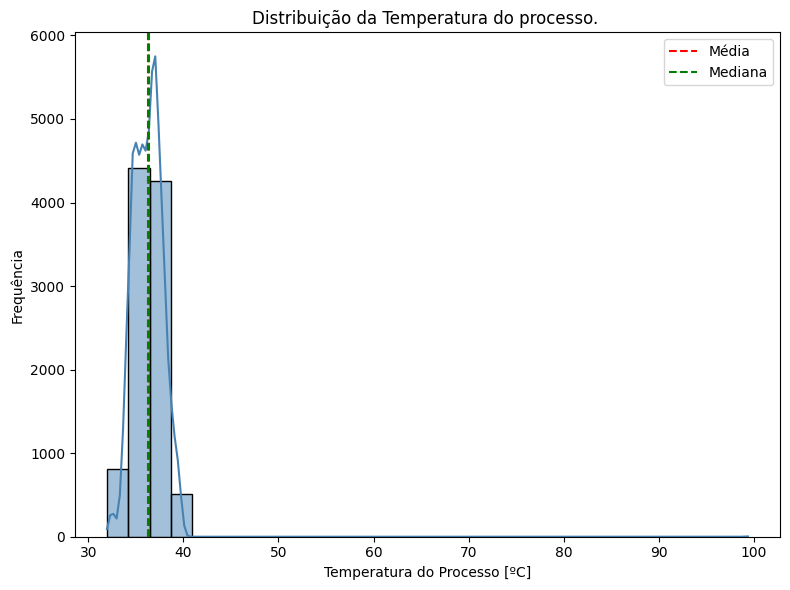

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(df['Temperatura do Processo [ºC]'], kde=True, bins=30, color='steelblue')
plt.axvline(df['Temperatura do Processo [ºC]'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['Temperatura do Processo [ºC]'].median(), color='green', linestyle='--', label='Mediana')
plt.title('Distribuição da Temperatura do processo. ')
plt.xlabel('Temperatura do Processo [ºC]')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

### Análise da Distribuição: Temperatura do Processo [ºC]
A distribuição da **Temperatura do Processo [ºC]** apresenta média e mediana próximas, o que sugere uma distribuição aproximadamente simétrica.

No entanto, o histograma com a curva de densidade (KDE) indica uma leve bimodalidade, com dois picos:

Um principal, localizado após a média/mediana,

E um secundário, situado antes da média.

Essa bimodalidade pode estar associada a diferentes fases do processo, condições ambientais variáveis ou até mudanças no regime de controle térmico, como ciclos automáticos de aquecimento/resfriamento.

Apesar dessa característica, a distribuição permanece relativamente compacta e sem grande dispersão, o que viabiliza o uso tanto da média quanto da mediana como parâmetros para análise estatística e imputação de valores faltantes.

Contudo, foi identificado um potencial outlier com temperatura em 100°C, valor significativamente distante do restante dos dados. É fundamental investigar a origem desse ponto:

Verificar se se trata de um erro de registro ou entrada no banco de dados;

Confirmar se o processo de fato atingiu essa temperatura;

Avaliar, nesse caso, se houve falha no sistema de controle térmico ou se o valor é coerente com uma condição operacional específica.

### *Velocidade Rotacional [rpm]*

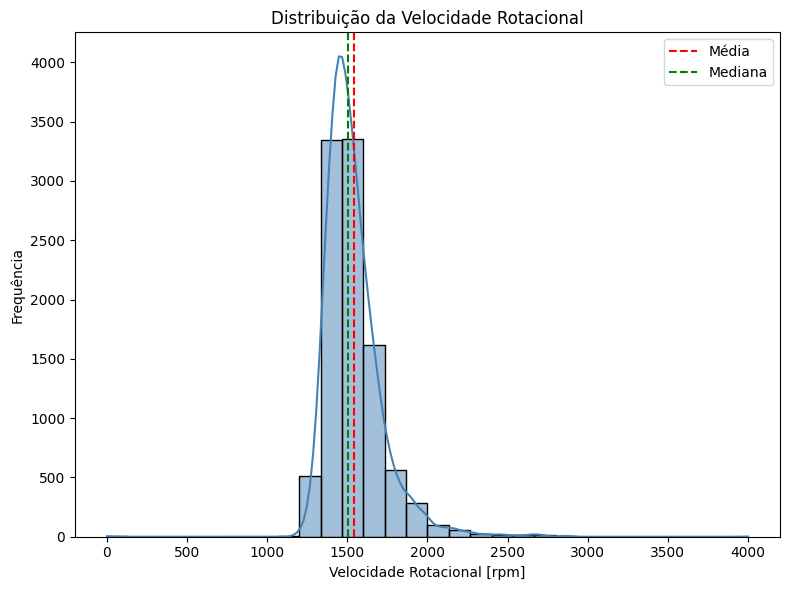

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(df['Velocidade Rotacional [rpm]'], kde=True, bins=30, color='steelblue')
plt.axvline(df['Velocidade Rotacional [rpm]'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['Velocidade Rotacional [rpm]'].median(), color='green', linestyle='--', label='Mediana')
plt.title('Distribuição da Velocidade Rotacional')
plt.xlabel('Velocidade Rotacional [rpm]')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

###Análise do Histograma: Velocidade Rotacional [RPM]

A distribuição da **Velocidade Rotacional** se aproxima de uma **distribuição normal**, porém com uma leve **assimetria à direita** — ou seja, é mais concentrada à esquerda, com uma cauda se estendendo para valores mais altos.

A maioria dos dados está entre **1250 e 2000 rpm**, com poucos registros acima de **2250 rpm**. Essa assimetria pode indicar **ocorrências ocasionais de operação em alta rotação**, mas não representa um padrão dominante.

Como a distribuição é razoavelmente simétrica e sem valores extremos marcantes, o uso da **média ou mediana** como medida central é adequado, e não há necessidade imediata de transformação nos dados.


### *Torque [Nm]*


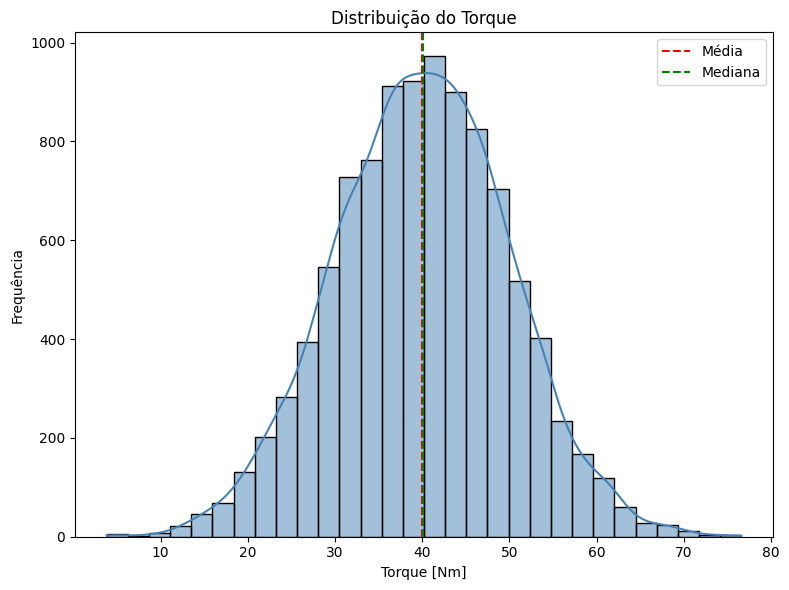

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(df['Torque [Nm]'], kde=True, bins=30, color='steelblue')
plt.axvline(df['Torque [Nm]'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['Torque [Nm]'].median(), color='green', linestyle='--', label='Mediana')
plt.title('Distribuição do Torque')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

### Análise do Histograma: Torque [Nm]

No gráfico de distribuição do **Torque [Nm]**, observamos que a **média** e a **mediana** estão praticamente sobrepostas. Isso confirma que a variável possui uma **distribuição simétrica**, característica de uma **distribuição normal**.

Essa simetria sugere que o uso da **média** como medida de tendência central e para imputação de valores ausentes (caso existam) é apropriado, pois não há influência significativa de outliers ou assimetria.


### *Desgaste da ferramenta [min]*


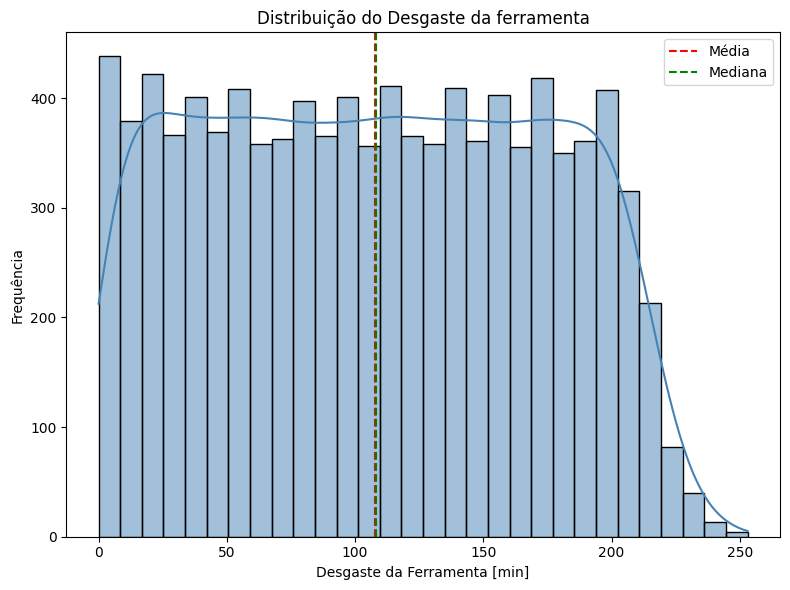

In [45]:
plt.figure(figsize=(8,6))
sns.histplot(df['Desgaste da Ferramenta [min]'], kde=True, bins=30, color='steelblue')
plt.axvline(df['Desgaste da Ferramenta [min]'].mean(), color='red', linestyle='--', label='Média')
plt.axvline(df['Desgaste da Ferramenta [min]'].median(), color='green', linestyle='--', label='Mediana')
plt.title('Distribuição do Desgaste da ferramenta')
plt.xlabel('Desgaste da Ferramenta [min]')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()

### Análise do desgaste da Ferramenta [min]

O histograma do **Desgaste da Ferramenta** mostra uma distribuição em formato de **sino largo e compacto**, indicando que os valores estão bem distribuídos ao redor da média.

Observa-se que a **média e a mediana estão praticamente no mesmo ponto**, sinalizando uma distribuição **simétrica** e sem presença significativa de outliers ou assimetria.

Essa característica sugere que o uso da **média** como medida de tendência central é apropriado para análise e para imputação de valores faltantes, caso existam.


## Boxplot

*Comparando Características por Ocorrência de Falha*

Para compreender melhor o comportamento do sistema, é fundamental observar como as variáveis numéricas se distribuem **quando agrupadas pela variável "Falha Geral"**.

Essa comparação permite analisar **média, mediana e desvio padrão** de cada característica, tanto para os casos em que **não houve falha (0)** quanto para os casos em que **houve falha (1)**.

Além disso, podemos visualizar essas diferenças por meio de **boxplots** e **gráficos de barras com erro padrão**, facilitando a identificação de padrões, desvios e possíveis relações entre as variáveis e a ocorrência de falhas.



In [46]:
colunas_importantes = ['Temperatura do ar [ºC]',
                       'Temperatura do Processo [ºC]',
                       'Velocidade Rotacional [rpm]',
                       'Desgaste da Ferramenta [min]']

# 2. Estatísticas descritivas agrupadas por Falha Geral
estatisticas = df.groupby('Falha Geral')[colunas_importantes].describe().transpose()

# 3. Extraindo apenas as estatísticas desejadas (mean, 50%, 75%)
estatisticas_desejadas = estatisticas.loc[pd.IndexSlice[:, ['mean', '50%', '75%']], :]

# 4. Comparação direta entre os grupos (média)
comparativo = df.groupby('Falha Geral')[colunas_importantes].mean().transpose()
comparativo['diferença'] = comparativo[1] - comparativo[0]

# 5. Exibindo os dados
print("=== Estatísticas Desejadas por Falha Geral ===")
print(estatisticas_desejadas.round(2))

print("\n=== Comparativo de Médias entre Falha 1 e 0 ===")
print(comparativo.round(2))


=== Estatísticas Desejadas por Falha Geral ===
Falha Geral                              0        1
Temperatura do ar [ºC]       mean    26.82    27.71
                             50%     26.85    28.35
                             75%     28.35    29.35
Temperatura do Processo [ºC] mean    36.25    36.54
                             50%     36.25    36.65
                             75%     37.35    37.45
Velocidade Rotacional [rpm]  mean  1540.10  1498.36
                             50%   1507.00  1365.00
                             75%   1614.00  1427.00
Desgaste da Ferramenta [min] mean   106.65   143.80
                             50%    106.50   164.50
                             75%    160.00   207.25

=== Comparativo de Médias entre Falha 1 e 0 ===
Falha Geral                         0        1  diferença
Temperatura do ar [ºC]          26.82    27.71       0.88
Temperatura do Processo [ºC]    36.25    36.54       0.29
Velocidade Rotacional [rpm]   1540.10  1498.36     -41

Temperatura do Ar:
Em média, casos com falha ocorrem em ambientes ~1 ºC mais quentes, sugerindo que o calor ambiente pode contribuir para o risco de falhas.

Temperatura do Processo:
Diferença pequena (+0,29 ºC), indicando que o processo é bem controlado mesmo em casos com falha.

Velocidade Rotacional:
Casos com falha ocorrem, em média, com rotação 42,8 rpm menor, o que pode indicar falhas em operações de menor intensidade ou sob maior esforço mecânico.

Desgaste da Ferramenta:
É a variável com maior diferença: falhas ocorrem após ~145 min de uso, enquanto operações normais duram ~106 min. Isso sugere uma forte relação entre desgaste e falhas.



In [47]:
# Cria categorias por faixa de rotação (em rpm)
bins = [0, 1200, 1400, 1600, 1800, 2000, df['Velocidade Rotacional [rpm]'].max()]
labels = ['<1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000', '>2000']

df['Faixa Rotacional'] = pd.cut(df['Velocidade Rotacional [rpm]'], bins=bins, labels=labels)

# Calcula taxa de falha por faixa
falha_por_faixa = df.groupby('Faixa Rotacional')['Falha Geral'].mean() * 100

print(falha_por_faixa.round(2))


Faixa Rotacional
<1200        40.00
1200-1400    12.54
1400-1600     0.95
1600-1800     0.61
1800-2000     0.81
>2000        14.54
Name: Falha Geral, dtype: float64


/tmp/ipython-input-47-3393975586.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  falha_por_faixa = df.groupby('Faixa Rotacional')['Falha Geral'].mean() * 100


### Análise da taxa de falha por faixa de velocidade rotacional

Observamos três faixas críticas com taxas de falha elevadas:

- **Rotação abaixo de 1200 rpm:** a máquina falha em 40% dos casos, indicando alto risco operacional nessa faixa de baixa rotação.
- **Rotação entre 1200 e 1400 rpm:** apresenta 12,5% de falhas, ainda um ponto de atenção significativo.
- **Rotação acima de 2000 rpm:** taxa de falha de 14,5%, sugerindo que velocidades muito altas também impactam negativamente a operação.

Entre 1400 e 2000 rpm, as taxas de falha ficam abaixo de 1%, indicando faixas de operação mais estáveis e seguras.

Esses insights podem direcionar a manutenção preventiva e ajustes operacionais para otimizar a performance e reduzir falhas.


### *Temperatura do Ar* por Falha Geral


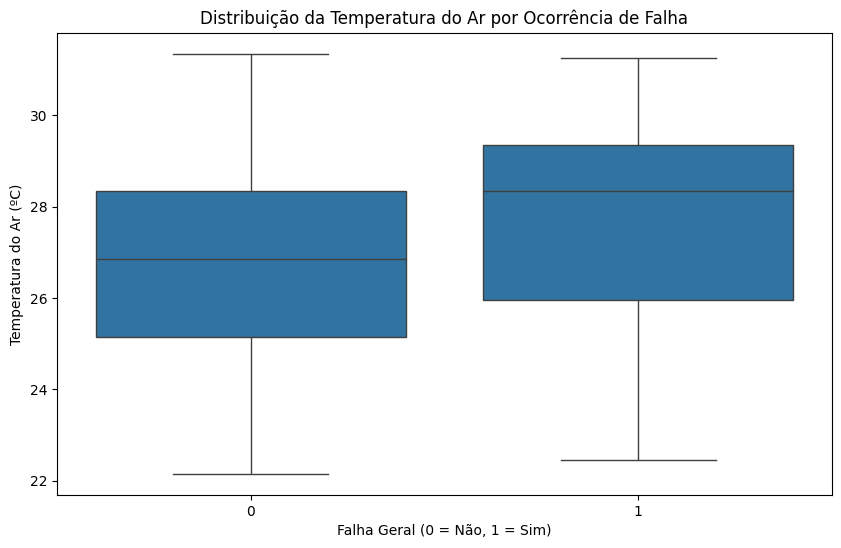

In [48]:
# Boxplot da distruibuição da Temperatura do Ar por Ocorrência de Falha.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Falha Geral', y='Temperatura do ar [ºC]', data=df)
plt.title('Distribuição da Temperatura do Ar por Ocorrência de Falha')
plt.xlabel('Falha Geral (0 = Não, 1 = Sim)')
plt.ylabel('Temperatura do Ar (ºC)')
plt.show()

O *boxplot da distribuição da Temperatura do Ar por Ocorrência de Falha* revela que a média da temperatura é ligeiramente maior nos casos em que ocorrem falhas, indicando uma possível correlação entre temperaturas mais elevadas e falhas no processo. Além disso, observa-se que os valores de temperatura nos casos com falha tendem a ser ligeiramente mais altos em comparação aos casos sem falha, sugerindo um comportamento distinto nessas condições.

### *Temperatura do Processo* por Falha Geral

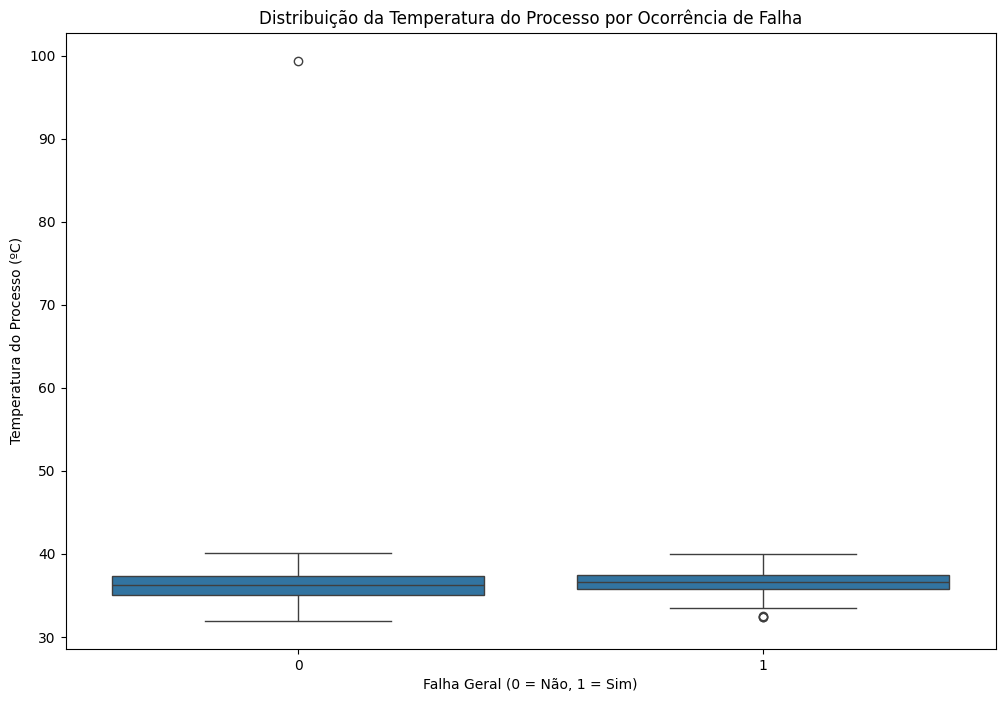

In [49]:
# Boxplot da Temperatura do processo por Ocorrência de Falha.
plt.figure(figsize=(12, 8))
sns.boxplot(x='Falha Geral', y='Temperatura do Processo [ºC]', data=df)
plt.title('Distribuição da Temperatura do Processo por Ocorrência de Falha')
plt.xlabel('Falha Geral (0 = Não, 1 = Sim)')
plt.ylabel('Temperatura do Processo (ºC)')
plt.show()

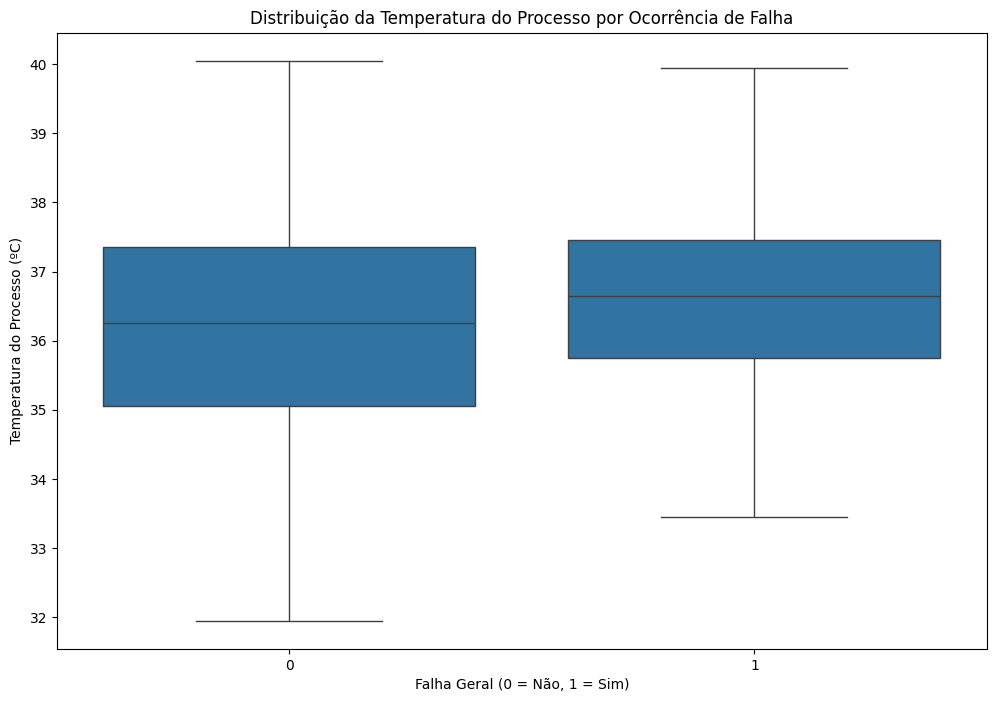

In [50]:
#Criando o mesmo gráfico porém sem outiliers, é importante saber se tem outilers, porém na analise está atrapalhando ter insights
plt.figure(figsize=(12, 8))
sns.boxplot(x='Falha Geral', y='Temperatura do Processo [ºC]', data=df, showfliers=False)
plt.title('Distribuição da Temperatura do Processo por Ocorrência de Falha')
plt.xlabel('Falha Geral (0 = Não, 1 = Sim)')
plt.ylabel('Temperatura do Processo (ºC)')
plt.show()

O boxplot da Temperatura do Processo por Ocorrência de Falha indica a presença de outliers tanto nos valores mínimos quanto máximos. Ainda assim, observa-se que a temperatura do processo é relativamente controlada tanto nos casos com falha quanto sem falha, com médias ligeiramente superiores nos registros com falha, o que pode indicar uma leve tendência de aumento de temperatura associada a essas ocorrências.

### Boxplot da Velocidade Rotacional por falha Geral

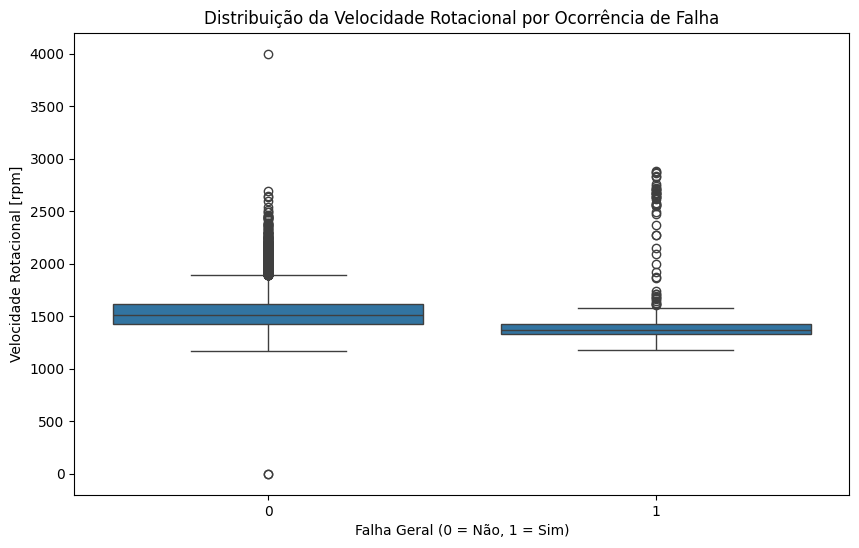

In [51]:
# Boxplot da Velocidade Rotacional por Falha geral
plt.figure(figsize=(10, 6))
sns.boxplot(x='Falha Geral', y='Velocidade Rotacional [rpm]', data=df)
plt.title('Distribuição da Velocidade Rotacional por Ocorrência de Falha')
plt.xlabel('Falha Geral (0 = Não, 1 = Sim)')
plt.ylabel('Velocidade Rotacional [rpm]')
plt.show()

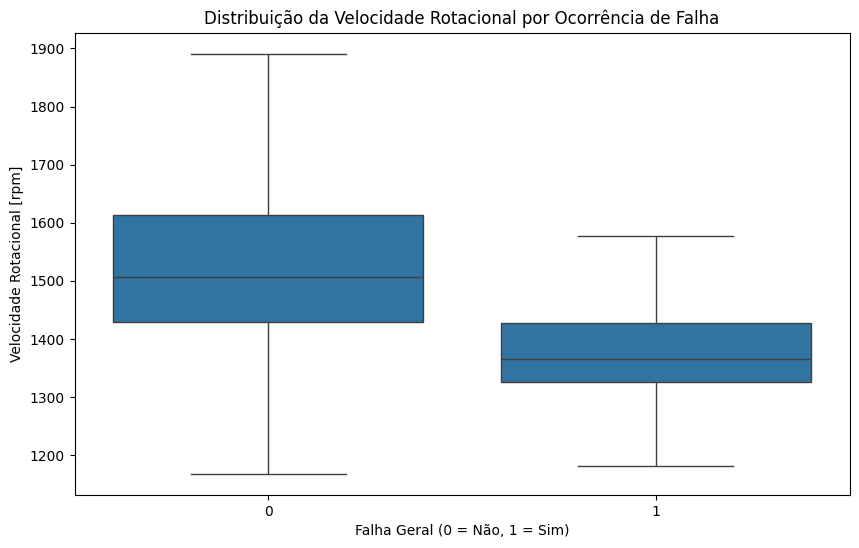

In [52]:
# Boxplot da velocidade Rotacional por ocorrencia de falha
plt.figure(figsize=(10, 6))
sns.boxplot(x='Falha Geral', y='Velocidade Rotacional [rpm]', data=df,showfliers=False)
plt.title('Distribuição da Velocidade Rotacional por Ocorrência de Falha')
plt.xlabel('Falha Geral (0 = Não, 1 = Sim)')
plt.ylabel('Velocidade Rotacional [rpm]')
plt.show()

Análise do Boxplot da Velocidade Rotacional por Falha Geral
O boxplot revela dois padrões importantes:

Presença significativa de outliers, principalmente no grupo sem falha (Falha Geral = 0), indicando alta variabilidade da rotação em condições normais de operação.

Tendência de falhas ocorrerem em rotações mais baixas:
O grupo com Falha Geral = 1 apresenta uma mediana visivelmente menor, e o corpo do boxplot (entre Q1 e Q3) está deslocado para valores de rpm inferiores em comparação ao grupo sem falha

Isso sugere que baixas rotações estão associadas a maior risco de falha, o que é consistente com a análise anterior da taxa de falhas por faixa de rotação, onde o grupo < 1200 rpm apresentava 40% de taxa de falha.

A grande quantidade de outliers pode indicar:

Comportamentos operacionais extremos que não necessariamente levam a falha;

Condições operacionais específicas que merecem investigação mais aprofundada (ex: ciclos de partida/parada ou ajustes manuais).

O comportamento do boxplot reforça a hipótese de que a faixa de rotação é uma variável crítica no modelo de manutenção preditiva.
Investigar os casos com baixa rotação pode ajudar a antecipar falhas e ajustar parâmetros operacionais.

### Boxplot do Desgaste da ferramenta por Falha Geral:

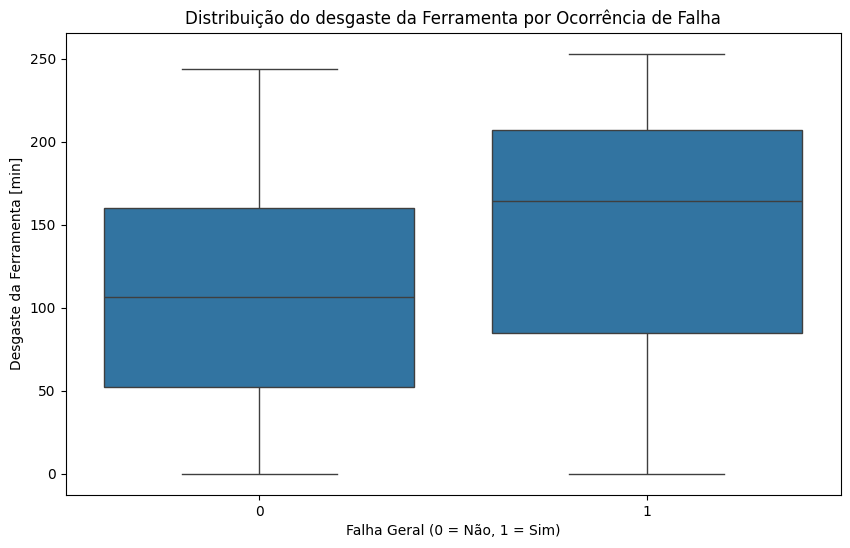

In [53]:
# Boxplot do Desgaste da Ferramenta por Falha Geral
plt.figure(figsize=(10, 6))
sns.boxplot(x='Falha Geral', y='Desgaste da Ferramenta [min]', data=df)
plt.title('Distribuição do desgaste da Ferramenta por Ocorrência de Falha')
plt.xlabel('Falha Geral (0 = Não, 1 = Sim)')
plt.ylabel('Desgaste da Ferramenta [min]')
plt.show()

Análise do Boxplot - Desgaste da Ferramenta por Falha Geral

O Boxplot do **Desgaste da Ferramenta** em relação à **Falha Geral** reforça a ideia de que **quanto maior o tempo de uso da ferramenta, maior a chance de ocorrer uma falha**.

- **Casos com falha (1):**
  - O **primeiro quartil (Q1)** está próximo de **100 minutos**.
  - A **mediana (Q2)** está em torno de **150 minutos**.
  - O **terceiro quartil (Q3)** se aproxima de **200 minutos**.
  - Não há presença de outliers, o que indica que os valores estão bem distribuídos dentro do intervalo interquartil.

- **Casos sem falha (0):**
  - O **Q1** está próximo de **50 minutos**, mostrando que parte significativa das máquinas operou por pouco tempo sem apresentar falha.
  - A **mediana** está em **100 minutos**.
  - O **Q3** ultrapassa os **150 minutos**, indicando que mesmo com uso elevado, nem todas as ferramentas resultaram em falha.

Essa análise reforça o desgaste como uma **variável relevante para a predição de falhas**, especialmente quando os valores ultrapassam a faixa de **150 minutos**.


### Boxplot Torque por Falha Geral

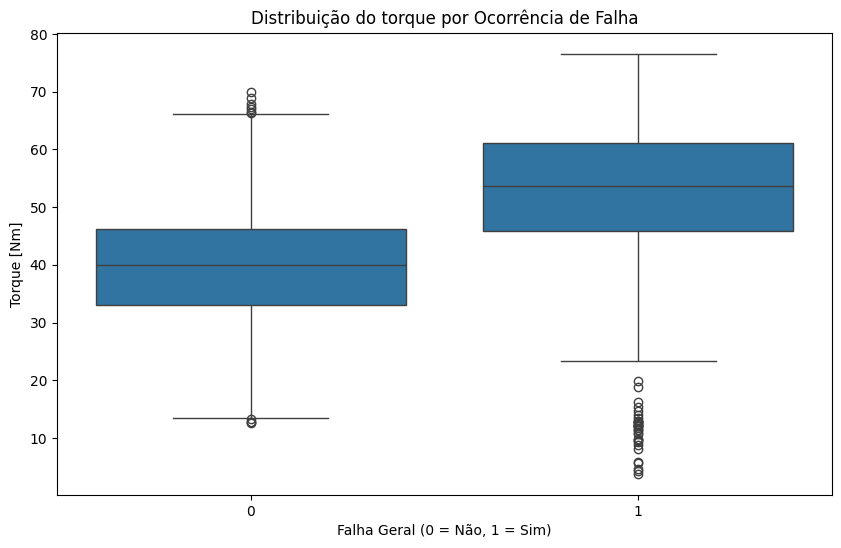

In [54]:
# Boxplot do Torque po falha Geral
plt.figure(figsize=(10, 6))
sns.boxplot(x='Falha Geral', y='Torque [Nm]', data=df)
plt.title('Distribuição do torque por Ocorrência de Falha')
plt.xlabel('Falha Geral (0 = Não, 1 = Sim)')
plt.ylabel('Torque [Nm]')
plt.show()

Análise do Boxplot - Torque por Falha Geral

O boxplot do **Torque [Nm]** em relação à **Falha Geral** revela informações importantes sobre o comportamento dessa variável:

- **Casos com falha (1):**
  - O **primeiro quartil (Q1)** está entre **40 e 50 Nm**.
  - A **mediana (Q2)** está próxima de **55 Nm**.
  - O **terceiro quartil (Q3)** fica em torno de **60 Nm**.
  - Observa-se a presença de **outliers com valores baixos de torque**, indicando que falhas também ocorreram em condições fora do padrão esperado.

- **Casos sem falha (0):**
  - A **mediana** está próxima de **40 Nm**.
  - O **Q1** está ligeiramente acima de **30 Nm** e o **Q3** abaixo de **50 Nm**.
  - Há **outliers tanto na cauda inferior quanto na superior**, o que evidencia uma **dispersão maior** nos dados e a necessidade de atenção no tratamento dessas exceções.

Essa análise sugere que o **torque elevado** está associado com maior incidência de falhas, mas também há casos atípicos com falhas em torques baixos. Portanto, o **tratamento adequado de outliers** pode ser um passo relevante no pré-processamento dos dados.


Boxplot do Desgaste da Ferramenta por faixa Rotacional

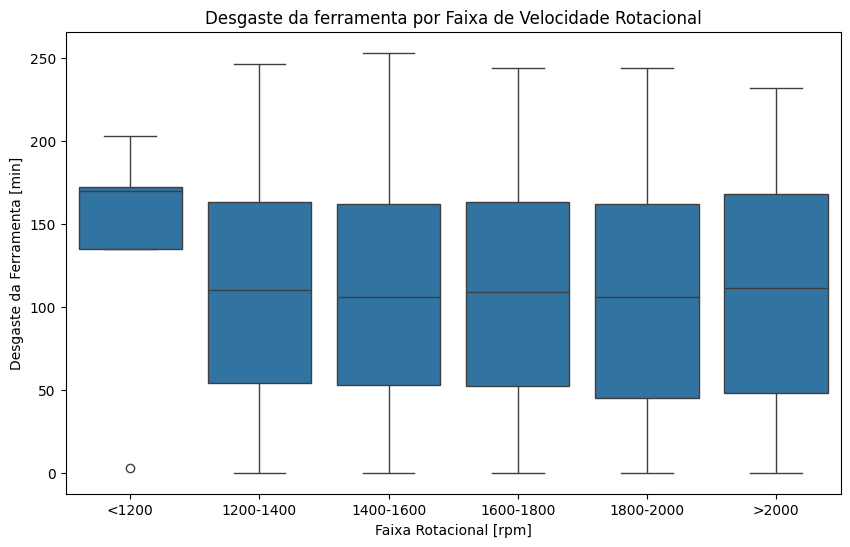

In [55]:
# Boxplot do Desgaste da Ferramenta por faixa rotacional
plt.figure(figsize=(10, 6))
sns.boxplot(x='Faixa Rotacional', y='Desgaste da Ferramenta [min]', data=df)
plt.title('Desgaste da ferramenta por Faixa de Velocidade Rotacional')
plt.xlabel('Faixa Rotacional [rpm]')
plt.ylabel('Desgaste da Ferramenta [min]')
plt.show()

Análise do Boxplot - Desgaste da Ferramenta por Faixa Rotacional

A análise do **boxplot do Desgaste da Ferramenta** agrupado por **faixas de Velocidade Rotacional** revela padrões distintos de comportamento:

- **Faixa < 1200 rpm**:
  - Apresenta o **maior desgaste médio** entre todas as faixas.
  - A **mediana** ultrapassa os **150 minutos** de uso.
  - O **limite superior** está em torno de **200 minutos** e o **limite inferior** não é visível.
  - Existe um **outlier inferior com valor zero**, que deve ser tratado — pode-se considerar a imputação com a **média** ou **mediana** do grupo.

- **Demais faixas (1200 a <2000 rpm)**:
  - Apresentam **menor desgaste** e mais **consistência** entre os valores.
  - A **mediana** gira em torno de **100 minutos** em todas as faixas.
  - O **primeiro quartil (Q1)** está próximo de **50 minutos**, e o **terceiro quartil (Q3)** em **150 minutos**.
  - A **variação entre Q1 e Q3 é pequena**, indicando uma distribuição mais homogênea.

Essa análise sugere que máquinas operando com **baixa rotação (< 1200 rpm)** tendem a apresentar **maior desgaste da ferramenta**, o que pode indicar **sobrecarga** ou **condições menos ideais de operação**. A presença de outliers com desgaste zero deve ser tratada antes de aplicar qualquer modelo preditivo.


## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [56]:
df.head(1)

,ID Único,ID do Produto,Tipo,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória,Faixa Rotacional
0,1,M14860,M,24.95,34.85,1551.0,42.8,0.0,0,0,0,0,0,0,1400-1600


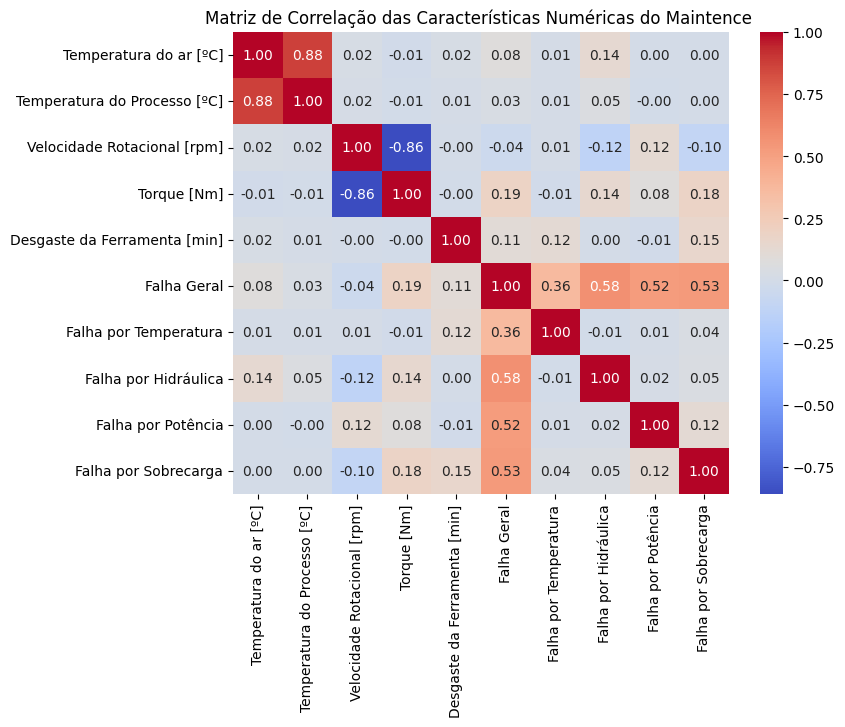

In [57]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, 3:13].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Maintence ')
plt.show()

*Análise da Matriz de Correlação (Heatmap)*

A matriz de correlação revela padrões interessantes entre variáveis contínuas e variáveis de falha no sistema de manutenção. Aqui estão os principais destaques:

Correlações fortes (|cor| > 0.8):
Temperatura do Processo × Temperatura do Ar:
Correlação positiva forte (0.88).
***Quanto maior a temperatura do ar, maior tende a ser a temperatura do processo: comportamento esperado em sistemas térmicos.***

Torque × Velocidade Rotacional:
Correlação negativa forte (-0.86).
***Com aumento da velocidade rotacional, o torque aplicado tende a diminuir — típico de sistemas com controle de carga.***

Correlações moderadas com a variável "Falha Geral":
Falha por Hidraulica x Falha Geral: 0.58

Falha por Sobrecarga x Falha Geral: 0.53

Falha por Potência x Falha Geral: 0.52

Falha por Temperatura x Falha Geral: 0.36
***Esses três tipos de falha específicas têm correlação significativa com a falha geral. Podem ser bons preditores ou explicar uma parte das causas de falha.***

Correlações fracas com "Falha Geral":
Torque × Falha Geral: 0.19

Desgaste da Ferramenta × Falha Geral: 0.11

Temperatura do Ar × Falha Geral: 0.08

Temperatura do Processo × Falha Geral: 0.03

Velocidade Rotacional × Falha Geral: -0.04

Essas variáveis têm pouca correlação direta com a falha, o que indica que, isoladamente, não explicam muito bem a ocorrência de falhas. Contudo, podem ganhar importância em combinação com outras variáveis ou em modelos não-lineares.

**A Temperatura do ar e do processo estão fortemente relacionadas, mas pouco relacionadas diretamente com falhas. Elas podem ser variáveis intermediárias ou de contexto.**

Torque e rotação se anulam parcialmente, o que é tecnicamente esperado.

As falhas específicas (sobrecarga, potência, temperatura) são as variáveis que mais explicam a falha geral.

Essas variáveis de falha podem ser excelentes entradas para um modelo preditivo (como regressão logística ou árvore de decisão).

## Tratamento de Valores Nulos
Através da Analise Exploratória de dados foi possível observar que o dataset apresentava valores nulos. Portanto o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [58]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Ai4i2020 Predctive Maintenance")
df.isnull().sum()

Valores nulos no dataset Ai4i2020 Predctive Maintenance


,0
ID Único,0
ID do Produto,0
Tipo,0
Temperatura do ar [ºC],512
Temperatura do Processo [ºC],0
Velocidade Rotacional [rpm],100
Torque [Nm],0
Desgaste da Ferramenta [min],112
Falha Geral,0
Falha por Temperatura,0


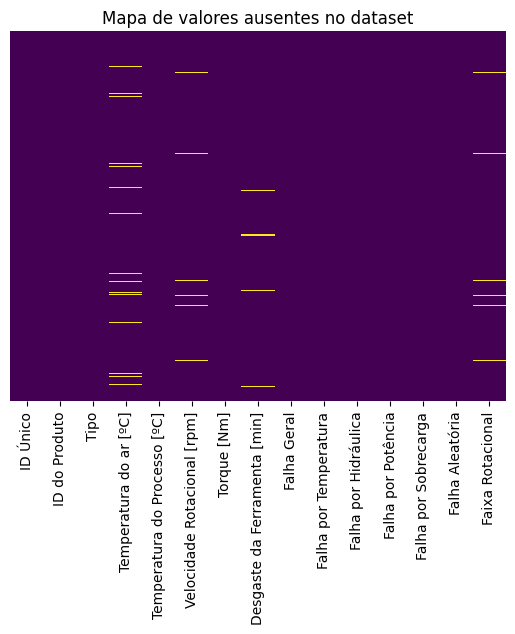

In [59]:
#Verificando novamente o heatmat.
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Mapa de valores ausentes no dataset")
plt.show()

### Tratamento de missing Temperatura do ar
Em temperatura do ar tem 512 missing e como vimos através da análise exploraória de dados os dados são mais homogêneos e portanto é ideal fazer a input da média nesses missing, tendo em vista que não são sensíveis a outliers.

In [60]:
# inputando a média em temperatura do Ar, como em temperatura do ar no
# histograma vimos que os dados são mais homogenedos é mais ideal fazer o input da média.

media_TemperaturadoAr = df['Temperatura do ar [ºC]'].mean()
print(f'A média é: {media_TemperaturadoAr:.2f} ºC') # Verificando o valor calculado.

A média é: 26.85 ºC


In [61]:
#tratando os missing da temperatura do ar com a média
df.fillna({'Temperatura do ar [ºC]': media_TemperaturadoAr}, inplace=True)
df['Temperatura do ar [ºC]'].isnull().sum() #Verificando se foi tratado

np.int64(0)

### Tratamento de missing em Velocidade Rotacional

Em Velocidade rotacional tem 100 missing, e como vimos na Analise Exploratória de dados é uma coluna mais robusta e portanto mais sensível a média, a inputação de valores ausentes será feita pela mediana

In [62]:
#inputando a mediana em velocidade rotacional, como vimos no histograma é um dado mais robusto, mais sensivel a média.
mediana_VelocidadeRotacional = sts.median(df['Velocidade Rotacional [rpm]']) #Calculando a mediana.
print(mediana_VelocidadeRotacional)

df.fillna({'Velocidade Rotacional [rpm]': mediana_VelocidadeRotacional}, inplace=True)
#substituindo os valores nulos pela mediana.

df['Velocidade Rotacional [rpm]'].isnull().sum()

1352.0


np.int64(0)

### Tratamento de missing em Desgaste da Ferramenta.

Em Desgaste da Ferramenta tem 112 missing, e como vimos na **Análise Exploratória de Dados** é uma coluna mais robusta e portanto mais sensível a média, a imputação de valores ausentes será feita pela mediana

In [63]:
#inputando a mediana em Desgaste da ferramenta, como vimos no histograma é um dado mais robusto, mais sensivel a média.
mediana_DesgastedaFerramenta = sts.median(df['Desgaste da Ferramenta [min]']) #Calculando a mediana.
print(mediana_DesgastedaFerramenta)

df.fillna({'Desgaste da Ferramenta [min]': mediana_DesgastedaFerramenta}, inplace=True)
#substituindo os valores nulos pela mediana.

df['Desgaste da Ferramenta [min]'].isnull().sum()

135.0


np.int64(0)

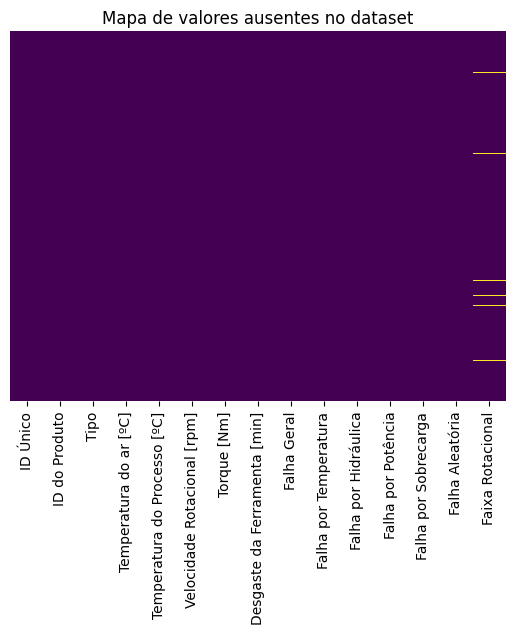

In [64]:
#Verificando novamente o heatmat.
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Mapa de valores ausentes no dataset")
plt.show()

Foi realizado o tratamento de valores ausentes para todas as colunas originais do conjunto de dados, assegurando que não haja registros incompletos nas variáveis utilizadas na modelagem.

A variável adicional "Faixa Rotacional" foi criada exclusivamente para fins de análise exploratória, por meio da discretização da variável contínua "Velocidade Rotacional". Seu objetivo foi facilitar a identificação visual de padrões e tendências entre faixas operacionais distintas.

Entretanto, essa variável não será incorporada ao modelo preditivo, uma vez que sua derivação é direta de uma variável já presente no conjunto e sua inclusão poderia induzir redundância ou multicolinearidade. Sendo assim, ela será descartada antes da etapa de modelagem.


#Tratando outliers e valores discrepantes.

Outliers, Temperatura do processo, através do Boxplot foi perceptível que a temperatura do processo tem outlier máximo e mínimo, por isso vamos trabalhar essa variável e tratar o outlier pela média.

In [65]:
df['Temperatura do Processo [ºC]'].describe()

,Temperatura do Processo [ºC]
count,10000.000000
mean,36.262025
std,1.612439
min,31.950000
25%,35.050000
50%,36.350000
75%,37.350000
max,99.400000


**Análise de Outliers**

Ao analisar os dados da variável em questão, observa-se que os outliers estão presentes apenas nos valores máximos, não havendo registros discrepantes nos valores mínimos. Esse equívoco ocorreu porque o boxplot analisado anteriormente foi segmentado por ocorrência de falha, e não baseado na distribuição geral da coluna inteira. Isso pode distorcer a percepção sobre a presença real de outliers na variável.

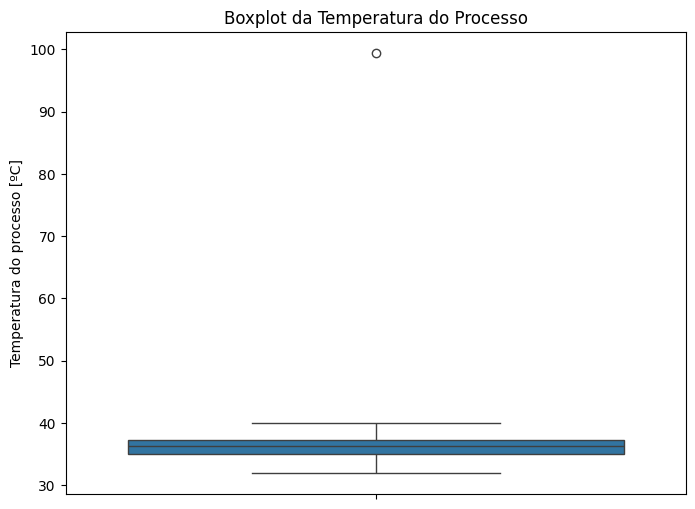

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Temperatura do Processo [ºC]'])
plt.title('Boxplot da Temperatura do Processo')
plt.ylabel('Temperatura do processo [ºC]')
plt.show()


In [67]:
df.loc[(df['Temperatura do Processo [ºC]'] < 0) | (df['Temperatura do Processo [ºC]'] > 50)]



,ID Único,ID do Produto,Tipo,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória,Faixa Rotacional
2,3,L47182,L,26.854163,99.4,1498.0,49.4,5.0,0,0,0,0,0,0,1400-1600


**Validação de Outliers em Temperatura do Processo**

Aplicando filtros com base nos limites mínimo e máximo aceitáveis, foi possível verificar que há apenas uma linha com outlier extremo na variável Temperatura do Processo. Essa constatação reforça que a maioria dos dados está dentro da faixa operacional esperada, com exceção pontual que pode ser tratada separadamente.

In [68]:
Media_TemperaturaProcesso = df['Temperatura do Processo [ºC]'].mean()

df.loc[(df['Temperatura do Processo [ºC]'] < 0) | (df['Temperatura do Processo [ºC]'] > 50),
       'Temperatura do Processo [ºC]'] = Media_TemperaturaProcesso

In [69]:
#Conferindo se deu certo.
df.loc[(df['Temperatura do Processo [ºC]'] < 0) | (df['Temperatura do Processo [ºC]'] > 50)]




,ID Único,ID do Produto,Tipo,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória,Faixa Rotacional


Após o tratamento aplicado, é possível observar que a variável **Temperatura do Processo [°C]** **não apresenta mais outliers visíveis** nas visualizações estatísticas. A distribuição dos dados está agora mais coerente e concentrada, sem valores extremos que possam comprometer a análise.

Essa ausência de outliers indica que a variável foi **adequadamente tratada**, refletindo com mais fidelidade o comportamento operacional real e contribuindo para a robustez das análises subsequentes.


A variável **Velocidade Rotacional** apresentou valores discrepantes tanto nos extremos mínimos quanto nos máximos, indicando a presença de outliers em ambas as extremidades da distribuição. Esses valores devem ser analisados com atenção, pois podem representar erros de medição ou condições operacionais anômalas.

In [70]:
df['Velocidade Rotacional [rpm]'].describe()

,Velocidade Rotacional [rpm]
count,10000.000000
mean,1536.829300
std,182.626643
min,0.000000
25%,1420.000000
50%,1501.000000
75%,1610.000000
max,4000.000000


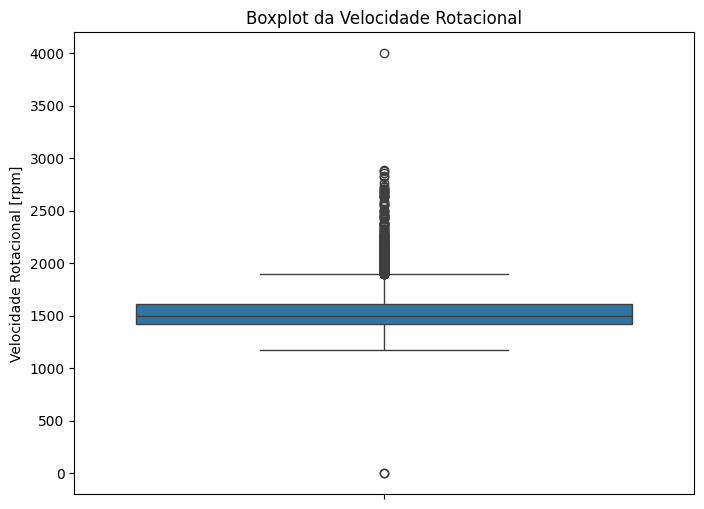

In [71]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Velocidade Rotacional [rpm]'])
plt.title('Boxplot da Velocidade Rotacional')
plt.ylabel('Velocidade Rotacional [rpm]')
plt.show()

A partir da visualização por boxplot, observa-se que a variável **Velocidade Rotacional [rpm]** apresenta diversos valores discrepantes quando comparados à distribuição central dos dados.

- Há registros com valores extremamente baixos, como **0 rpm**, o que pode sugerir falhas no registro ou em sensores, já que dificilmente uma máquina em operação real apresentaria rotação nula.
- Também são identificados **valores muito elevados**, como **acima de 30000 rpm**, que destoam significativamente do padrão da amostra e indicam forte assimetria na cauda superior da distribuição.
- A maioria dos dados está concentrada em uma faixa bem mais estreita, sugerindo que essas observações extremas não seguem a tendência geral do conjunto.

Essa variável demanda uma análise mais profunda e um possível tratamento para garantir a qualidade e consistência dos dados.

In [72]:
#Regra do IQR
Q1_Velocidade = df['Velocidade Rotacional [rpm]'].quantile(0.25)
Q3_Velocidade = df['Velocidade Rotacional [rpm]'].quantile(0.75)

IQR_Velocidade = Q3_Velocidade - Q1_Velocidade

Limite_inferior_VelocidadeIQR = Q1_Velocidade - 1.5 * IQR_Velocidade
Limite_superior_velocidadeIQR = Q3_Velocidade + 1.5 *IQR_Velocidade

print(f'Valores aceitaveis de {Limite_inferior_VelocidadeIQR} até {Limite_superior_velocidadeIQR} rpm')

Valores aceitaveis de 1135.0 até 1895.0 rpm


Embora o IQR (Intervalo Interquartil) aponte um limite superior de aproximadamente **1895 rpm** para a variável **Velocidade Rotacional**, é importante considerar o conhecimento de domínio: valores de até **3000 rpm** são perfeitamente plausíveis em cenários reais de operação.

Dessa forma, foi optado por estabelecer **limites técnicos mais coerentes com a realidade do processo**, entre **600 rpm e 3000 rpm**. Valores fora desse intervalo foram tratados por substituição com a **mediana da variável**, o que nos permite mitigar distorções provocadas por outliers extremos, **sem comprometer a variabilidade legítima dos dados operacionais**.


In [73]:
#Definindo limite superior e inferior.
Limite_inferior_velocidade = 600
Limite_superior_velocidade = 3000

#Como a coluna é robusta e mais afetada pelos outiliers será inputado a mediana

Mediana_velocidade = df['Velocidade Rotacional [rpm]'].median()

df.loc[(df['Velocidade Rotacional [rpm]'] < Limite_inferior_velocidade) |
        (df['Velocidade Rotacional [rpm]'] > Limite_superior_velocidade), 'Velocidade Rotacional [rpm]'] = Mediana_velocidade



**Tratando os outiliers do torque**

In [74]:
df['Torque [Nm]'].describe()

,Torque [Nm]
count,10000.000000
mean,39.986910
std,9.968934
min,3.800000
25%,33.200000
50%,40.100000
75%,46.800000
max,76.600000


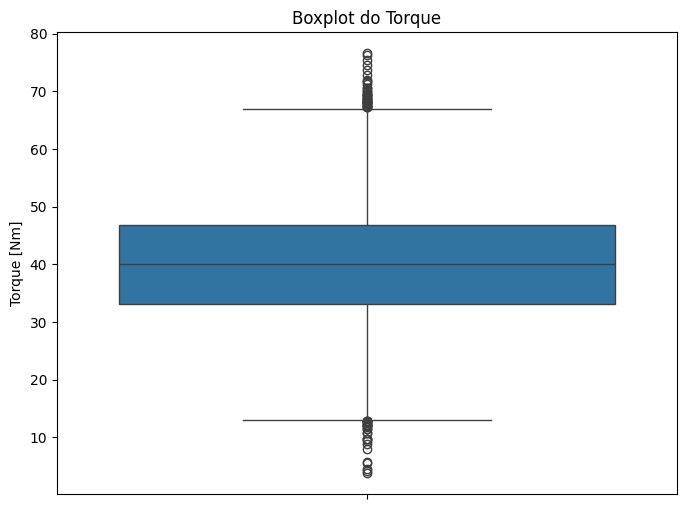

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Torque [Nm]'])
plt.title('Boxplot do Torque')
plt.ylabel('Torque [Nm]')
plt.show()

**Justificativa para Não Tratamento dos Dados de Torque**

Durante a análise exploratória do dataset **AI4I 2020 Predictive Maintenance**, foi observado que a variável **Torque [Nm]** apresenta valores variando entre **3.8** e **76.6 Nm**. Inicialmente, esses valores podem ser considerados como possíveis outliers com base na regra do intervalo interquartil (IQR). No entanto, optou-se por **não realizar o tratamento (remoção ou substituição) desses valores**.

A análise estatística mostra que a maior parte dos dados está concentrada entre **38 e 42 Nm**, com valores mais extremos ocorrendo com baixa frequência. Essa distribuição é compatível com o comportamento de máquinas operando sob diferentes cargas e regimes, e os valores não apresentam indícios de erro de medição ou inconsistência.

Os valores extremos de torque serão mantidos no dataset, pois são considerados **parte integrante e significativa do comportamento da máquina**. Não serão aplicadas técnicas de remoção de outliers, normalização seletiva ou substituição, a fim de preservar o conteúdo informativo e realista dos dados para fins de análise preditiva e diagnóstico de falhas.


**Tratamento da Coluna Tipo**

In [76]:
# Verificar valores únicos e suas contagens
print(df['Tipo'].value_counts())


Tipo
L    5999
M    2997
H    1003
O       1
Name: count, dtype: int64


In [77]:
df = df[df['Tipo'] != 'O']


In [78]:
print(df['Tipo'].value_counts()) #Verificando se de fato a linha foi apagada

Tipo
L    5999
M    2997
H    1003
Name: count, dtype: int64


Foi removido o único registro com valor inconsistente na variável categórica Tipo, que não correspondia a nenhuma das categorias válidas ('L', 'M' ou 'H'). Com essa ação, conclui-se a etapa de tratamento dos dados categóricos, garantindo a integridade e a consistência do conjunto de dados para as próximas fases de análise e modelagem.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [79]:
# Apagando as de falha
X = df.drop(['Falha Geral', 'Falha por Temperatura', 'Falha por Potência',
             'Falha por Sobrecarga', 'Falha por Hidráulica', 'Falha Aleatória'], axis=1)

# Target: apenas a coluna binária da falha
y = df['Falha Geral']


In [80]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42,stratify=y)

In [81]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (6999, 9)
Dimensões de X_test: (3000, 9)
Dimensões de y_train: (6999,)
Dimensões de y_test: (3000,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.

A normalização é  ideal para redes neurais, KNN e quando as variáveis possuem amplitude alta ou unidades diferentes, tendo isso em vista iremos aplicar a normalização na coluna  **Velocidade Rotacional [rpm]** é a mesma unidade, porém foi observado que sua amplitude é muito grande, a coluna apresenta uma alta variação.


In [82]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [83]:
# Apenas variáveis que possuem amplitude alta.

colunas_norm = ['Velocidade Rotacional [rpm]']
#Criando cópias dos dados
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

scaler_norm.fit(X_train[colunas_norm]) #fit usa apenas no treino

#Transformando treino e teste

X_train_norm[colunas_norm] = scaler_norm.transform(X_train[colunas_norm])
X_test_norm[colunas_norm] = scaler_norm.transform(X_test[colunas_norm])




In [84]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_norm, columns=X_train.columns)

In [85]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
      ID Único ID do Produto Tipo  Temperatura do ar [ºC]  \
1889      1890        H31303    H                   24.55   
5322      5323        M20182    M                   30.25   
8990      8991        L56170    L                   24.05   
4593      4594        L51773    L                   29.85   
6726      6727        L53906    L                   28.35   

      Temperatura do Processo [ºC]  Velocidade Rotacional [rpm]  Torque [Nm]  \
1889                         33.65                     0.153667         40.2   
5322                         38.95                     0.110012         55.3   
8990                         34.15                     0.189173         38.4   
4593                         37.45                     0.140279         41.9   
6726                         37.05                     0.193248         41.0   

      Desgaste da Ferramenta [min] Faixa Rotacional  
1889                         132.0        140

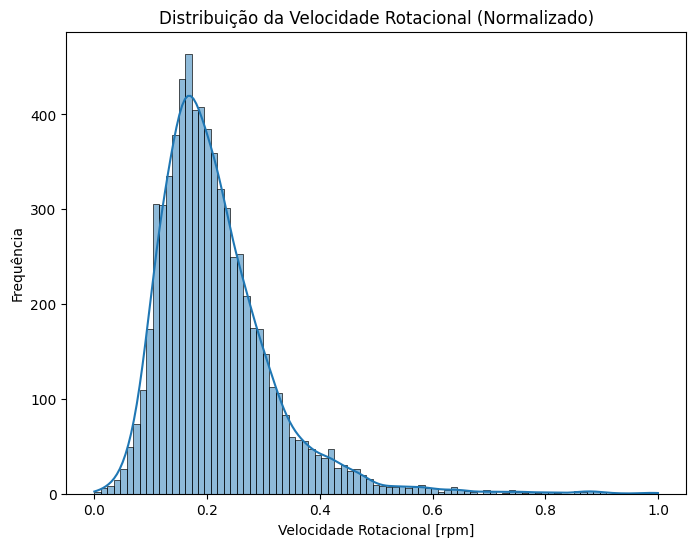

In [86]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Velocidade Rotacional [rpm]'], kde=True)
plt.title('Distribuição da Velocidade Rotacional (Normalizado)')
plt.xlabel('Velocidade Rotacional [rpm]')
plt.ylabel('Frequência')
plt.show()

O histograma do **Velocidade Rotacional [RPM]** após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

Foi realizada a padronização de algumas variáveis numéricas contínuas utilizando o StandardScaler, que transforma os dados para que tenham média igual a 0 e desvio padrão igual a 1.

Esse processo é particularmente importante para algoritmos que são sensíveis à dispersão e magnitude dos dados, como regressão logística, SVM, KNN e redes neurais, pois garante que todas as variáveis contribuam de forma equilibrada durante o treinamento.

As variáveis padronizadas foram:

* Torque [Nm]

* Desgaste da Ferramenta [min]

* Temperatura do ar [ºC]

* Temperatura do Processo [ºC]

Essas variáveis foram escolhidas por apresentarem escalas diferentes e, ao serem padronizadas, melhoram a estabilidade numérica dos algoritmos e contribuem para uma convergência mais eficiente durante o treinamento.

In [87]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

Colunas_standard = ['Torque [Nm]', 'Desgaste da Ferramenta [min]', 'Temperatura do ar [ºC]',
'Temperatura do Processo [ºC]']


In [88]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train[Colunas_standard])
#copia os conjuntos para armazenar od dados padronizados
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
#transformando os dois conjuntos, de treino e teste
X_train_standardized[Colunas_standard] = scaler_std.transform(X_train[Colunas_standard])
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized[Colunas_standard] = scaler_std.transform(X_test[Colunas_standard])

In [89]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [90]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
      ID Único ID do Produto Tipo  Temperatura do ar [ºC]  \
1889      1890        H31303    H               -1.181013   
5322      5323        M20182    M                1.738176   
8990      8991        L56170    L               -1.437083   
4593      4594        L51773    L                1.533321   
6726      6727        L53906    L                0.765113   

      Temperatura do Processo [ºC]  Velocidade Rotacional [rpm]  Torque [Nm]  \
1889                     -1.758318                       1432.0     0.028056   
5322                      1.819357                       1357.0     1.542301   
8990                     -1.420802                       1493.0    -0.152451   
4593                      0.806808                       1409.0     0.198533   
6726                      0.536794                       1500.0     0.108280   

      Desgaste da Ferramenta [min] Faixa Rotacional  
1889                      0.380937        140

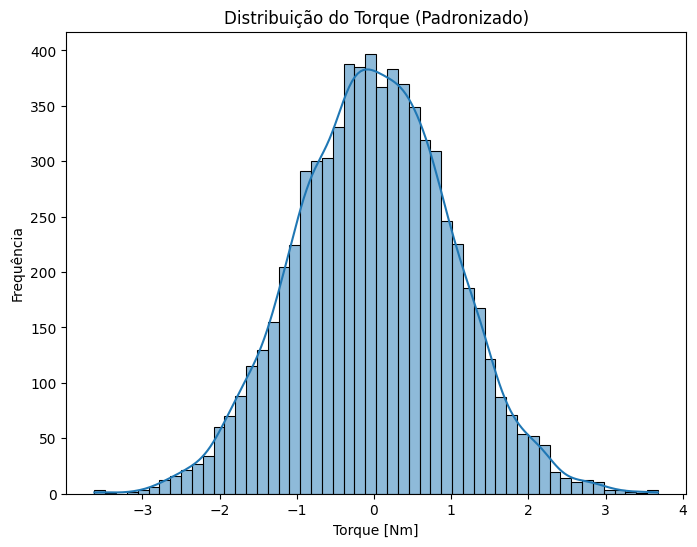

In [91]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['Torque [Nm]'], kde=True)
plt.title('Distribuição do Torque (Padronizado)')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequência')
plt.show()

Distribuição do Torque após Padronização

O histograma da variável **Torque [Nm]** após a aplicação do `StandardScaler` mostra que os valores foram transformados para ter uma **média próxima de 0** e um **desvio padrão igual a 1**.

Com isso, a distribuição foi **centralizada** em torno do zero, como esperado na padronização, e a maioria dos valores está concentrada no intervalo entre **-3.5 e +3.5**. Essa transformação é especialmente útil para algoritmos que assumem normalidade nos dados ou que são sensíveis à escala.
A padronização preserva a forma da distribuição original, mas altera a escala para facilitar o aprendizado dos modelos.


### One-hot encoding

Convertendo a variável categórica em um formato que pode ser fornecido a algoritmos de machine learning para melhorar a previsão.
A variável categórica Tipo foi transformada em variáveis numéricas por meio da técnica de One-Hot Encoding, utilizando a função pd.get_dummies().

Essa técnica foi aplicada para que algoritmos de machine learning consigam interpretar corretamente os dados categóricos, sem atribuir hierarquia ou ordem inexistente entre as categorias ('L', 'M', 'H'). Além disso, a codificação elimina o risco de viés ao tratar categorias como números contínuos.

O parâmetro drop_first=True foi utilizado para evitar a multicolinearidade, removendo a primeira categoria como referência.

In [92]:
#Codificar colunas categóricas
X_train_cat = pd.get_dummies(X_train[['Tipo']], drop_first=True)
X_test_cat = pd.get_dummies(X_test[['Tipo']], drop_first=True)


### Juntando as partes normalizadas, padronidas e one-hot coding.

Após realizar os processos de normalização, padronização e codificação, as variáveis foram reunidas em um único DataFrame para formar a base final que será utilizada nos modelos de machine learning.

As colunas normalizadas, padronizadas e as novas colunas criadas pelo One-Hot Encoding foram concatenadas, garantindo que todas estejam em formatos compatíveis e escalas adequadas. Esse passo é essencial para que os modelos possam aprender corretamente com os dados, maximizando a performance e a interpretação dos resultados.



In [93]:
X_train_final = pd.concat([
    X_train_standardized[Colunas_standard],
    X_train_norm[colunas_norm],
    X_train_cat
], axis = 1)

X_test_final = pd.concat([
    X_test_standardized[Colunas_standard],
    X_test_norm[colunas_norm],
    X_test_cat
], axis=1)

# Agora X_train_final e X_test_final estão prontos para uso em modelos
print("Conjunto final de treino:")
print(X_train_final.head())

Conjunto final de treino:
      Torque [Nm]  Desgaste da Ferramenta [min]  Temperatura do ar [ºC]  \
1889     0.028056                      0.380937               -1.181013   
5322     1.542301                     -1.209607                1.738176   
8990    -0.152451                      0.601408               -1.437083   
4593     0.198533                     -0.154494                1.533321   
6726     0.108280                      0.160465                0.765113   

      Temperatura do Processo [ºC]  Velocidade Rotacional [rpm]  Tipo_L  \
1889                     -1.758318                     0.153667   False   
5322                      1.819357                     0.110012   False   
8990                     -1.420802                     0.189173    True   
4593                      0.806808                     0.140279    True   
6726                      0.536794                     0.193248    True   

      Tipo_M  
1889   False  
5322    True  
8990   False  
4593   False

## Conclusão

### Hipótese 1: Quais variáveis operacionais estão mais associadas à ocorrência de falhas?

As variáveis **Torque**, **Desgaste da Ferramenta** e **Velocidade Rotacional** mostraram maior associação com falhas, tanto por meio de análise visual (boxplots e histogramas) quanto pelo comportamento estatístico observado nos casos de falha. Essas variáveis refletem diretamente o esforço mecânico a que a máquina é submetida, e desvios em seus padrões operacionais estão frequentemente associados a estados de estresse ou desgaste excessivo — fatores críticos na antecipação de falhas. Este achado reforça a viabilidade de usá-las como variáveis preditoras em modelos de manutenção preditiva.

---

### Hipótese 2: O tipo de produto influencia a probabilidade de falha?

O **Tipo L** apresentou maior número absoluto e percentual de falhas. No entanto, essa predominância deve ser relativizada, pois está proporcionalmente associada ao seu **maior volume de produção**. As diferenças nas taxas de falha entre os tipos L, M e H não foram substanciais a ponto de suportar uma conclusão estatisticamente robusta. Logo, **não se encontrou evidência suficiente para afirmar que o tipo de produto influencia significativamente o risco de falha da máquina**.

---

### Hipótese 3: Existem correlações fortes entre variáveis numéricas?

Sim. A análise da matriz de correlação revelou:

- **Torque [Nm]** e **Velocidade Rotacional [rpm]** com **correlação negativa forte** (*r ≈ -0,86*), o que é consistente com fundamentos físicos: à medida que o torque aplicado aumenta, o sistema tende a reduzir a velocidade de rotação para manter a integridade operacional.
  
- **Temperatura do Ar [ºC]** e **Temperatura do Processo [ºC]** com **correlação positiva forte** (*r ≈ 0,88*), o que também é esperado, dada a influência do ambiente térmico sobre os processos internos da máquina. Essa correlação sugere que pode ser redundante incluir ambas as variáveis em modelos sensíveis à multicolinearidade.

---

### Hipótese 4: Existem comportamentos discrepantes que podem afetar a análise?

Sim. A variável **Desgaste da Ferramenta** apresentou uma dispersão significativamente maior em relação às demais, com presença de outliers evidentes. Embora o dataset, como um todo, esteja bem estruturado, variáveis com essa característica podem comprometer algoritmos sensíveis à escala e à variância (ex: KNN, regressão logística), se não forem devidamente normalizadas ou tratadas com robustez estatística (ex: via mediana ou transformação logarítmica).

---

### Hipótese 5: A variável-alvo está balanceada?

A variável-alvo `Machine failure` apresenta a seguinte distribuição:

- **9661 instâncias sem falha** (`0`)
- **339 instâncias com falha** (`1`)

Essa proporção (~3,4% de falhas) caracteriza um **problema de classificação com desbalanceamento significativo**. Embora esse desbalanceamento reflita a realidade operacional — onde falhas são, de fato, eventos raros — ele **pode comprometer a capacidade preditiva de modelos supervisionados**, sobretudo se não forem adotadas estratégias de compensação (como balanceamento por oversampling, ajuste de pesos ou uso de métricas apropriadas como F1-score). Portanto, não se trata apenas de uma proporção “esperada”, mas de uma condição que exige atenção metodológica.

---

### Hipótese 6: É possível prever falhas com base em padrões dos sensores?

Sim. Os dados indicam que valores elevados de **Velocidade Rotacional**, particularmente acima de 2.000 rpm, estão associados a maior incidência de falhas. Isso sugere que esse atributo pode atuar como um **indicador de risco operacional**. Padrões similares foram observados também no comportamento do torque e desgaste da ferramenta. Esses achados reforçam a hipótese de que **falhas podem, sim, ser antecipadas com base em variáveis de sensores**, o que justifica a aplicação de modelos preditivos voltados à manutenção preditiva.

---

### Considerações Finais

A análise realizada cumpre os objetivos propostos: investigar as relações entre variáveis operacionais e ocorrência de falhas, identificar padrões críticos e preparar os dados para futuras etapas de modelagem. O próximo passo lógico é a construção de modelos de classificação supervisionada, avaliados com foco na classe minoritária (falhas), de modo a garantir sua utilidade prática em contextos industriais reais.

